In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)
rc("savefig", dpi=300)
rc("figure", dpi=192)

plt.rcParams['figure.figsize'] = 6, 4


pd.options.display.max_columns = 999
pd.options.display.max_rows = 400


from datetime import datetime
str(datetime.now())

from scenarios_plots import get_data_wc

import h5py

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def savefig(filename):
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/latex version/img/{}.pgf'.format(filename))
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/latex version/img/{}.pdf'.format(filename))
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/tables and figures/img/{}.pgf'.format(filename))
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/tables and figures/img/{}.pdf'.format(filename))

In [3]:
# P_2016_cutoff_2020_1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_gradual_increase_2020_cutoff_to_hist1985_2100.mat', 'r')
# P_2016_cutoff_2025_1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_gradual_increase_2025_cutoff_to_hist1985_2100.mat', 'r')
# P_2016_cutoff_2030_1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_gradual_increase_2030_cutoff_to_hist1985_2100.mat', 'r')
# P_2016_cutoff_2035_1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_gradual_increase_2035_cutoff_to_hist1985_2100.mat', 'r')
# P_2016_cutoff_2040_1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_gradual_increase_2040_cutoff_to_hist1985_2100.mat', 'r')
# P_2016_cutoff_2045_1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_gradual_increase_2045_cutoff_to_hist1985_2100.mat', 'r')
# P_2016_cutoff_2050_1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_gradual_increase_2050_cutoff_to_hist1985_2100.mat', 'r')

# P_2016_cutoff1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_2016_cutoff1985_2100.mat', 'r')

# P_2016_cutoff_to_0_2050_1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_gradual_increase_2050_cutoff1985_2100.mat', 'r')

# P_2016_pulse1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/48ts_P_2016_pulse1985_2100.mat', 'r')
# P_2016_increse1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/48ts_P_gradual_increase1985_2100.mat', 'r')
# hist20y = h5py.File('/Volumes/photo_video/Scenarios/48ts_T_only_full_scen_base_historical_20y1985_2100.mat', 'r')

P_gradual_increase_2015_cutoff_to_02000_2030 = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_P_gradual_increase_no_chl_2015_cutoff_to_0_2200_TRUE_17m_thermo_1985_2199.mat', 'r')
# P_gradual_increase_2015_cutoff_to_02000_2030 = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_P_gradual_increase_no_chl_2015_cutoff_to_0_2200_2000_2199.mat', 'r')
P_gradual_increase_2015_cutoff_to_02000_2030_no_sed = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_P_gradual_increase_no_chl_2015_cutoff_to_0_2200no_sed_TRUE_17m_thermo_2000_2199.mat', 'r')
# P_gradual_increase_2015_cutoff_to_02000_2030_no_sed = h5py.File('/Volumes/Igor EcoHDD/Scenarios/24_P_gradual_increas_no_chl_2015_cutoff_to_0_2200_no_sediment.mat', 'r')


In [4]:
days = len(np.array(P_gradual_increase_2015_cutoff_to_02000_2030['MyLake_results']['basin1']['concentrations']['C'])[:,8])

In [5]:
# scenarios = [P_2016_cutoff1985_2100, P_2016_pulse1985_2100, P_2016_cutoff_to_0_2050_1985_2100, P_2016_cutoff1985_2100, P_2016_cutoff_2020_1985_2100, P_2016_cutoff_2025_1985_2100, P_2016_cutoff_2030_1985_2100, P_2016_cutoff_2035_1985_2100, P_2016_cutoff_2040_1985_2100, P_2016_cutoff_2045_1985_2100, P_2016_cutoff_2050_1985_2100, hist20y]
scenarios = [P_gradual_increase_2015_cutoff_to_02000_2030]

In [6]:
# names_scen = ['P 2016 increse1985 2100', 'P 2016 pulse1985 2100', 'P 2016 cutoff to 0 2050 1985-2100', 'P 2016 cutoff to 0 2015 1985 2100', 'P 2016 cutoff 2020 1985 2100', 'P 2016 cutoff 2025 1985 2100', 'P 2016 cutoff 2030 1985 2100', 'P 2016 cutoff 2035 1985 2100', 'P 2016 cutoff 2040 1985 2100', 'P 2016 cutoff 2045 1985 2100', 'P 2016 cutoff 2050 1985 2100', 'hist20y']
# names_scen = ['P 2016 increse1985 2100', 'P 2016 pulse1985 2100', 'P 2016 cutoff to 0 2050 1985-2100', 'P 2016 cutoff to 0 2015 1985 2100', 'P 2016 cutoff 2020 1985 2100', 'P 2016 cutoff 2025 1985 2100', 'P 2016 cutoff 2030 1985 2100', 'P 2016 cutoff 2035 1985 2100', 'P 2016 cutoff 2040 1985 2100', 'P 2016 cutoff 2045 1985 2100', 'P 2016 cutoff 2050 1985 2100', 'hist20y']
names_scen = ['P 2016 cutoff']

In [7]:
date = datetime(1985, 1, 1)
ds = pd.date_range(date, date + timedelta(days-1), freq='D')

In [8]:
P_fx = pd.DataFrame({'Date': ds})

for res, n in zip(scenarios ,names_scen):
    P_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['PO4'])
#     P_fx[n] = res.env_getter('sediment')['sediment_transport_fluxes'][0, 0]['PO4'][0][0][0] + res.env_getter('sediment')['Bioirrigation_fx_zt'][0, 0]['PO4'][0][0][0]
    
P_fx['Year'] = P_fx.Date.dt.year
P_fx['Month'] = P_fx.Date.dt.month
P_fx['Day'] = P_fx.Date.dt.day
P_fx['DOY'] = P_fx.Date.dt.dayofyear
P_fx['WOY'] = P_fx.Date.dt.weekofyear

In [9]:
Phy = pd.DataFrame({'Date': ds})

for res, n in zip(scenarios,names_scen):
    Phy[n] = np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['C'])[:,:],axis=1) + np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['Chl'])[:,:], axis=1)
    
Phy['Year'] = Phy.Date.dt.year
Phy['Month'] = Phy.Date.dt.month
Phy['Day'] = Phy.Date.dt.day
Phy['DOY'] = Phy.Date.dt.dayofyear
Phy['WOY'] = Phy.Date.dt.weekofyear
# Phy = Phy[-365*55:]

In [10]:
Phy_4m = pd.DataFrame({'Date': ds})

for res, n in zip(scenarios,names_scen):
    Phy_4m[n] = np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['C'])[:,:9], axis=1) + np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['Chl'])[:,:9], axis=1)
    
Phy_4m['Year'] = Phy_4m.Date.dt.year
Phy_4m['Month'] = Phy_4m.Date.dt.month
Phy_4m['Day'] = Phy_4m.Date.dt.day
Phy_4m['DOY'] = Phy_4m.Date.dt.dayofyear
Phy_4m['WOY'] = Phy_4m.Date.dt.weekofyear
# Phy_4m = Phy_4m[-365*55:]

In [11]:
PO4_4m = pd.DataFrame({'Date': ds})

for res, n in zip(scenarios,names_scen):
    PO4_4m[n] = np.array(res['MyLake_results']['basin1']['concentrations']['P'])[:,8]
    
PO4_4m['Year'] = PO4_4m.Date.dt.year
PO4_4m['Month'] = PO4_4m.Date.dt.month
PO4_4m['Day'] = PO4_4m.Date.dt.day
PO4_4m['DOY'] = PO4_4m.Date.dt.dayofyear
PO4_4m['WOY'] = PO4_4m.Date.dt.weekofyear

In [12]:
PO4_mean = pd.DataFrame({'Date': ds})

for res, n in zip(scenarios,names_scen):
    PO4_mean[n] = np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['P'])[:,:],axis=1)
    
PO4_mean['Year'] = PO4_4m.Date.dt.year
PO4_mean['Month'] = PO4_4m.Date.dt.month
PO4_mean['Day'] = PO4_4m.Date.dt.day
PO4_mean['DOY'] = PO4_4m.Date.dt.dayofyear
PO4_mean['WOY'] = PO4_4m.Date.dt.weekofyear

In [13]:
# Phy_rate = pd.DataFrame({'Date': ds})

# z_myl  = np.array(P_gradual_increase_2015_cutoff_to_02000_2030['MyLake_results']['basin1']['z'])

# for res, n in zip(scenarios,names_scen):
#     Phy_rate[n] = np.trapz(np.array(res['MyLake_results']['basin1']['rates']['Growth_bioz_2']),z_myl) + np.trapz(np.array(res['MyLake_results']['basin1']['rates']['Growth_bioz']),z_myl)
    
# Phy_rate['Year'] = Phy.Date.dt.year
# Phy_rate['Month'] = Phy.Date.dt.month
# Phy_rate['Day'] = Phy.Date.dt.day
# Phy_rate['DOY'] = Phy.Date.dt.dayofyear
# Phy_rate['WOY'] = Phy.Date.dt.weekofyear

In [14]:
PO4_0m = pd.DataFrame({'Date': ds})

for res, n in zip(scenarios,names_scen):
    PO4_0m[n] = np.array(res['MyLake_results']['basin1']['concentrations']['P'])[:,0]
    
PO4_0m['Year'] = PO4_4m.Date.dt.year
PO4_0m['Month'] = PO4_4m.Date.dt.month
PO4_0m['Day'] = PO4_4m.Date.dt.day
PO4_0m['DOY'] = PO4_4m.Date.dt.dayofyear
PO4_0m['WOY'] = PO4_4m.Date.dt.weekofyear

In [15]:
date = datetime(2000, 1, 1)

In [16]:
days = len(np.array(P_gradual_increase_2015_cutoff_to_02000_2030_no_sed['MyLake_results']['basin1']['concentrations']['C'])[:,8])
date = datetime(2000, 1, 1)
ds = pd.date_range(date, date + timedelta(days-1), freq='D')

In [17]:
PO4_4m_no_sed = pd.DataFrame({'Date': ds})

for res, n in zip([P_gradual_increase_2015_cutoff_to_02000_2030_no_sed],['no sed']):
    PO4_4m_no_sed[n] = np.array(res['MyLake_results']['basin1']['concentrations']['P'])[:,8]
    
PO4_4m_no_sed['Year'] = PO4_4m_no_sed.Date.dt.year
PO4_4m_no_sed['Month'] = PO4_4m_no_sed.Date.dt.month
PO4_4m_no_sed['Day'] = PO4_4m_no_sed.Date.dt.day
PO4_4m_no_sed['DOY'] = PO4_4m_no_sed.Date.dt.dayofyear
PO4_4m_no_sed['WOY'] = PO4_4m_no_sed.Date.dt.weekofyear

In [18]:
PO4_mean_no_sed = pd.DataFrame({'Date': ds})

for res, n in zip([P_gradual_increase_2015_cutoff_to_02000_2030_no_sed],['no sed']):
    PO4_mean_no_sed[n] = np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['P'])[:,:],axis=1)
    
PO4_mean_no_sed['Year'] = PO4_mean_no_sed.Date.dt.year
PO4_mean_no_sed['Month'] = PO4_mean_no_sed.Date.dt.month
PO4_mean_no_sed['Day'] = PO4_mean_no_sed.Date.dt.day
PO4_mean_no_sed['DOY'] = PO4_mean_no_sed.Date.dt.dayofyear
PO4_mean_no_sed['WOY'] = PO4_mean_no_sed.Date.dt.weekofyear

In [19]:
Phy_no_sed = pd.DataFrame({'Date': ds})

for res, n in zip([P_gradual_increase_2015_cutoff_to_02000_2030_no_sed],['no sed']):
    Phy_no_sed[n] = np.array(res['MyLake_results']['basin1']['concentrations']['C'])[:,8] + np.array(res['MyLake_results']['basin1']['concentrations']['Chl'])[:,8]
    
Phy_no_sed['Year'] = Phy_no_sed.Date.dt.year
Phy_no_sed['Month'] = Phy_no_sed.Date.dt.month
Phy_no_sed['Day'] = Phy_no_sed.Date.dt.day
Phy_no_sed['DOY'] = Phy_no_sed.Date.dt.dayofyear
Phy_no_sed['WOY'] = Phy_no_sed.Date.dt.weekofyear

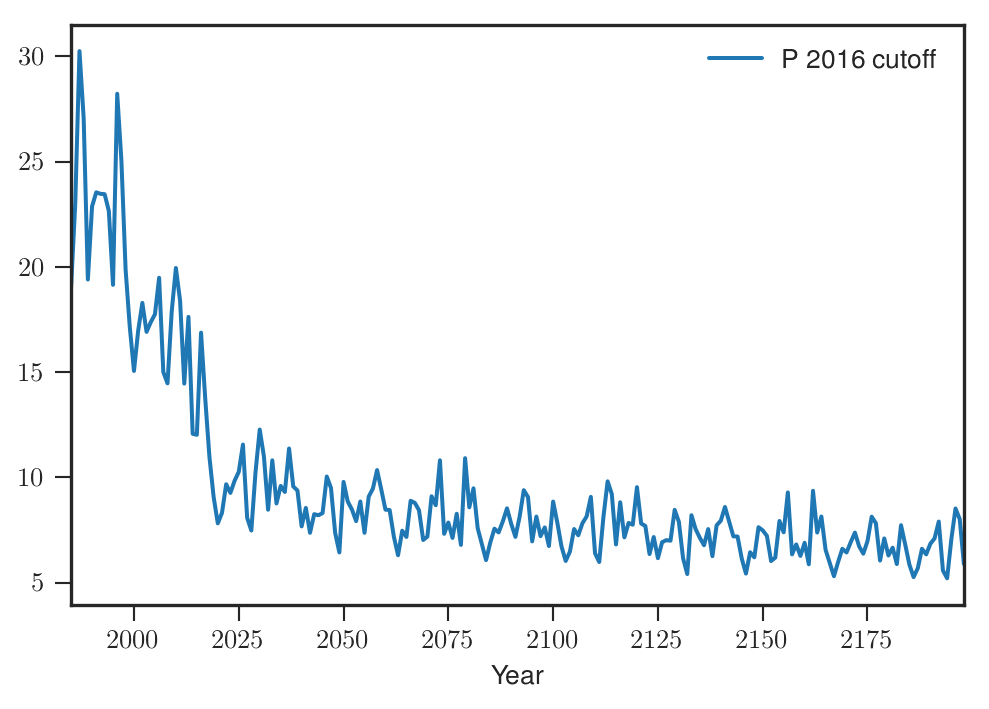

In [20]:
PO4_mean.groupby('Year').mean()[names_scen].plot()

Text(0,0.5,'P flux, $mg/m^2/d$')

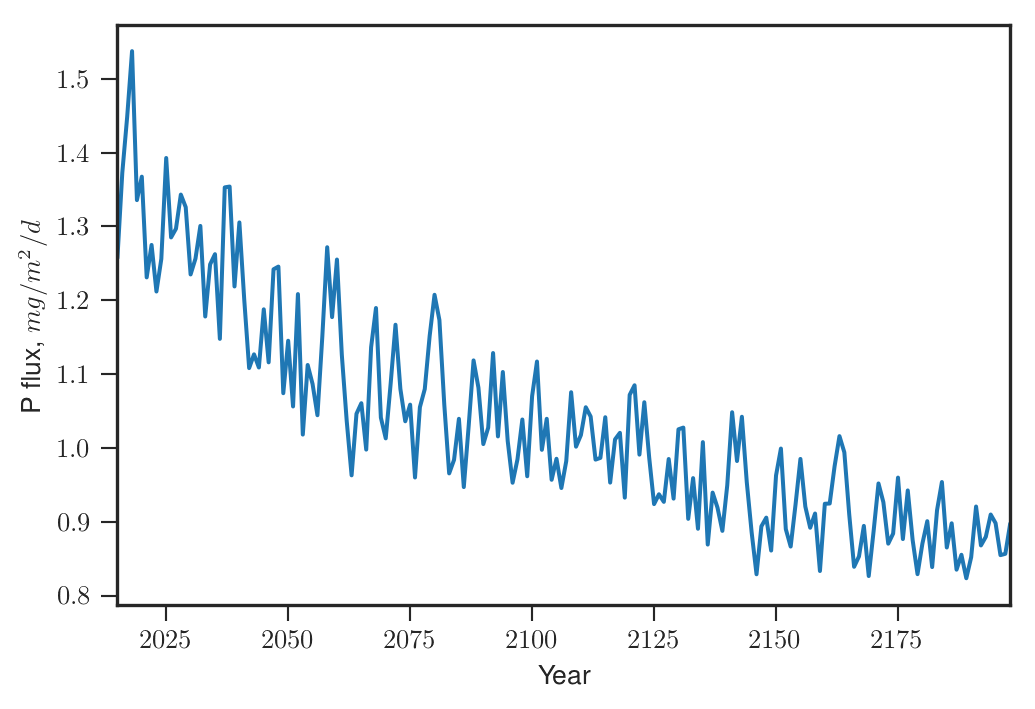

In [21]:
ax = P_fx[P_fx.Year>2014].groupby(['Year']).mean()[names_scen].plot()
ax.legend_.remove()
plt.ylabel('P flux, $mg/m^2/d$')
# ax.grid()

In [22]:
ds

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2198-11-22', '2198-11-23', '2198-11-24', '2198-11-25',
               '2198-11-26', '2198-11-27', '2198-11-28', '2198-11-29',
               '2198-11-30', '2198-12-01'],
              dtype='datetime64[ns]', length=72654, freq='D')

In [23]:
res

<HDF5 file "192ts_P_gradual_increase_no_chl_2015_cutoff_to_0_2200no_sed_TRUE_17m_thermo_2000_2199.mat" (mode r)>

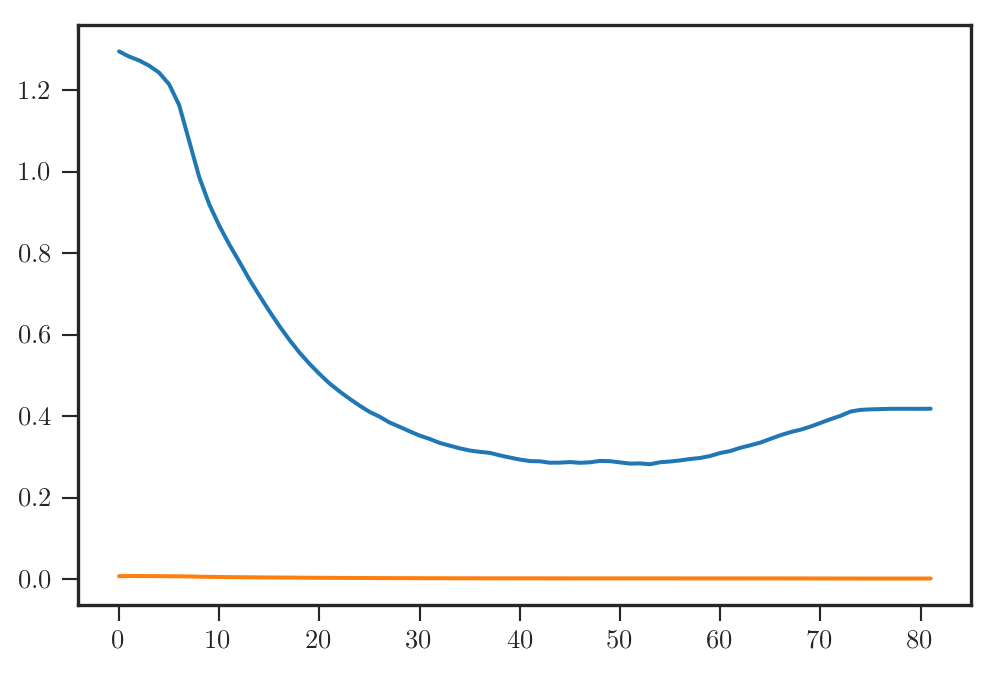

In [24]:
plt.plot(np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['C'])[:365*15,:],axis=0) + np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['Chl'])[:365*15,:], axis=0))
plt.plot(np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['C'])[365*15:,:],axis=0) + np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['Chl'])[365*15:,:], axis=0))

In [25]:
# plt.plot(Phy_rate.groupby('Year').mean()[names_scen].values)
# # plt.xlim(datetime(2001, 1, 1),datetime(2099, 1, 1))
# # plt.axvline(datetime(2015, 1, 1), c='k',linestyle='-.')
# plt.ylabel('Integrated Rate of Phy-P Growth $[mg\cdot m^2\cdot d^{-1}]$')

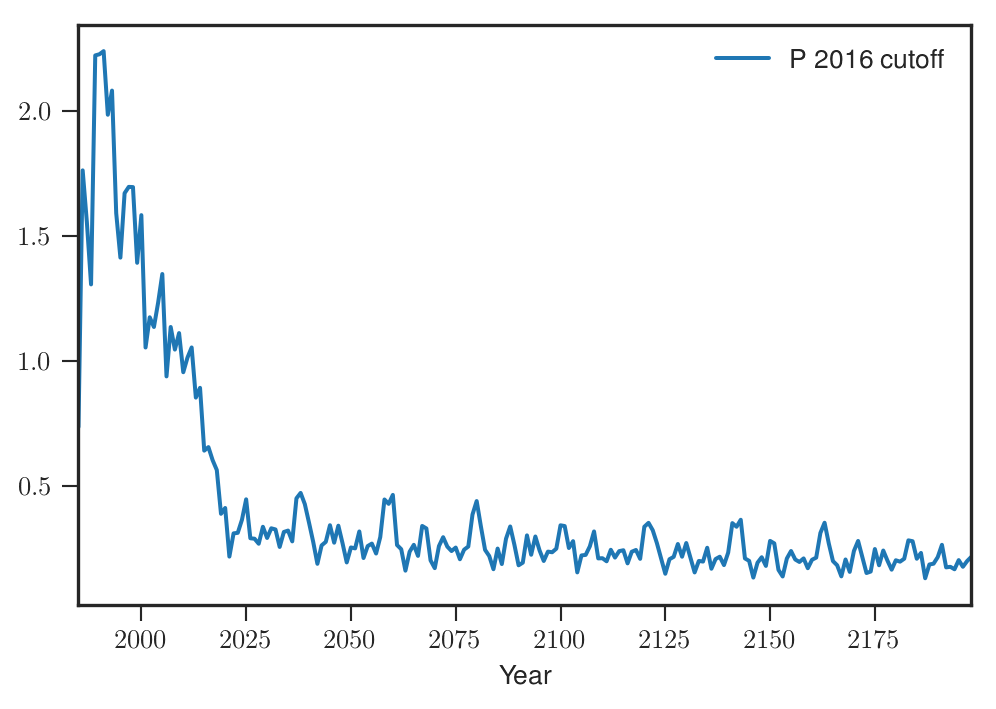

In [26]:
Phy.groupby('Year').mean()[names_scen].plot()

In [27]:
# plt.plot(ds, Phy[names_scen].values)
# plt.xlim(datetime(2001, 1, 1),datetime(2130, 1, 1))
# plt.axvline(datetime(2015, 1, 1), c='k',linestyle='-.')
# plt.ylabel('Phytoplankton, ug-P/L')

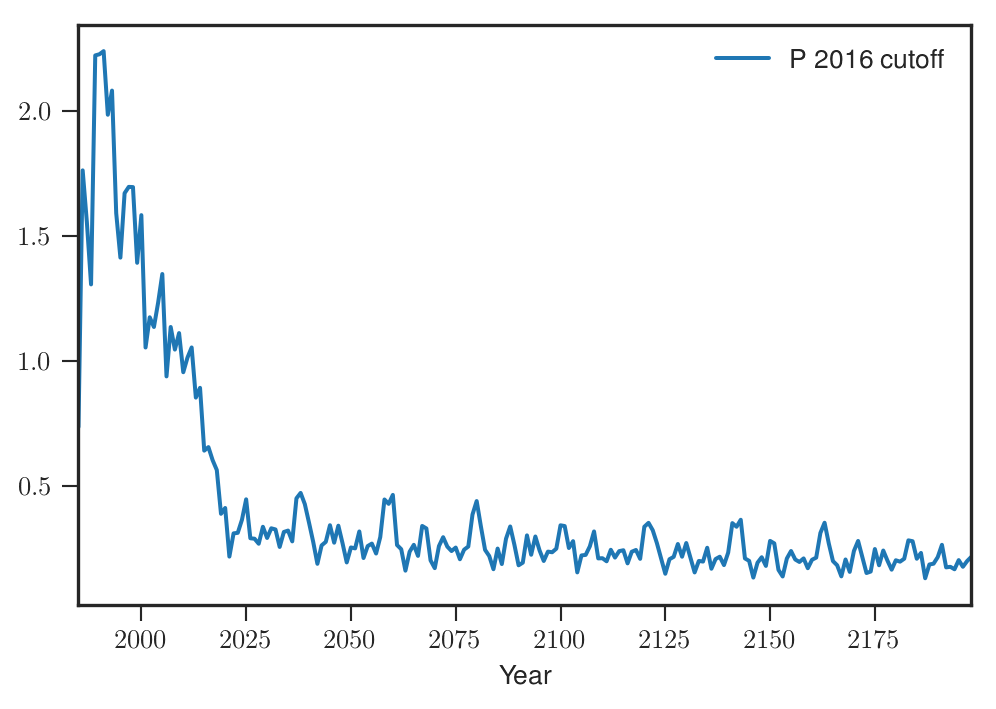

In [28]:
Phy.groupby('Year').mean()[names_scen].plot()

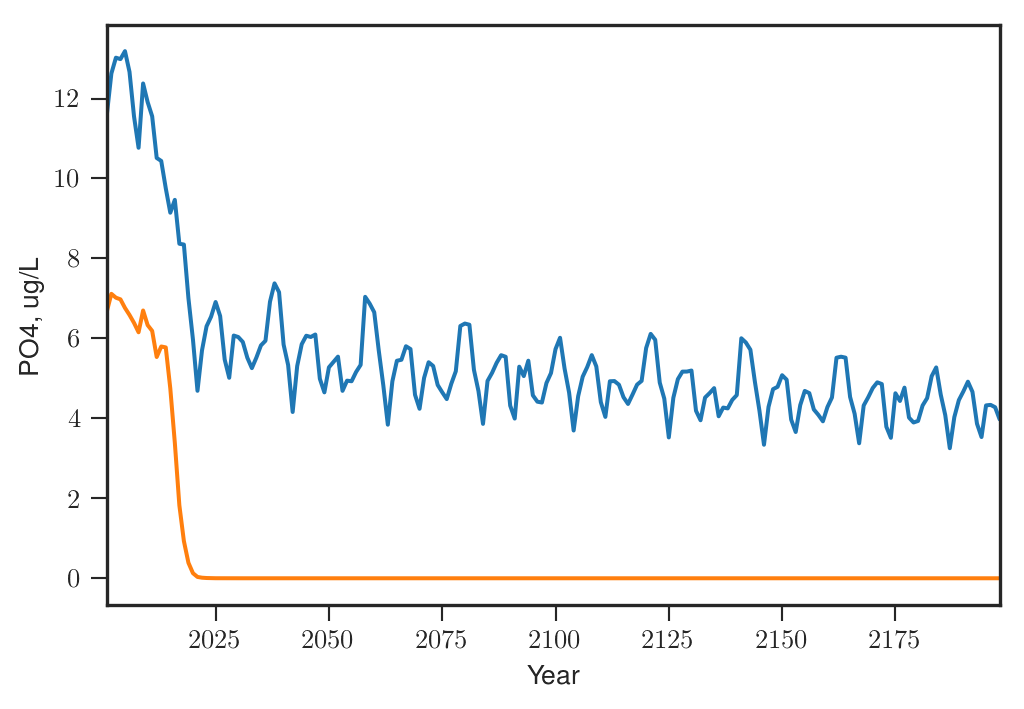

In [29]:
ax = PO4_4m[PO4_4m.Year>2000].groupby(['Year']).mean()[names_scen].plot()
ax = PO4_4m_no_sed[PO4_4m_no_sed.Year>2000].groupby(['Year']).mean()['no sed'].plot()
plt.ylabel('PO4, ug/L')
ax.legend_.remove()

In [30]:
np.mean(PO4_4m[PO4_4m.Year>2000].groupby(['Year']).mean()[names_scen])/np.mean(PO4_4m_no_sed[PO4_4m_no_sed.Year>2000].groupby(['Year']).mean()['no sed'])

P 2016 cutoff    10.817408
dtype: float64

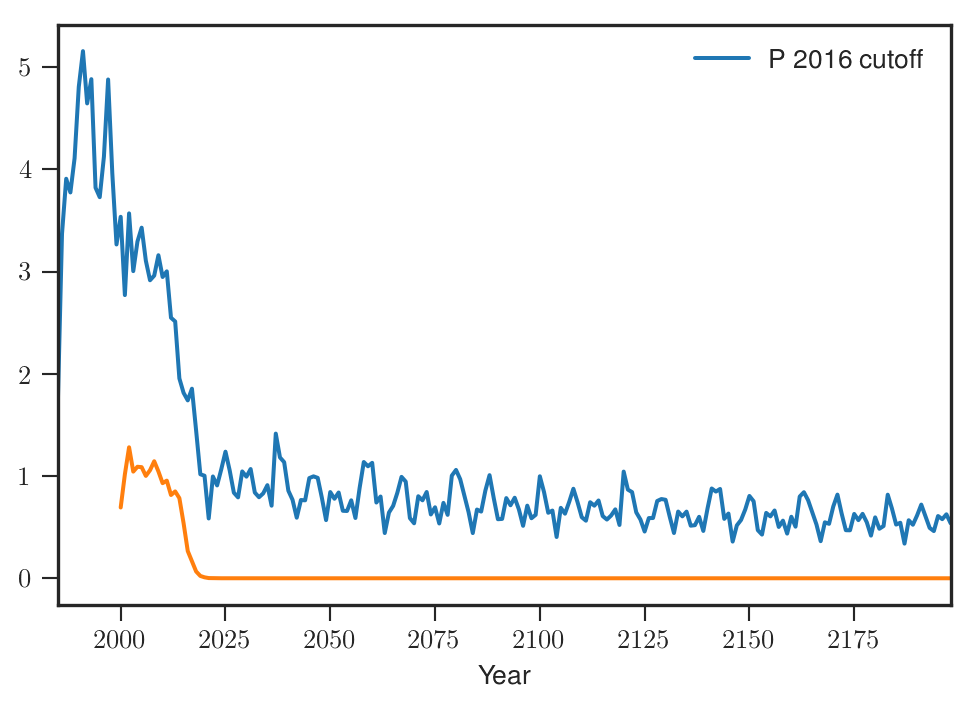

In [31]:
Phy_4m.groupby(['Year'])[names_scen].mean().plot()
Phy_no_sed.groupby(['Year'])['no sed'].mean().plot()

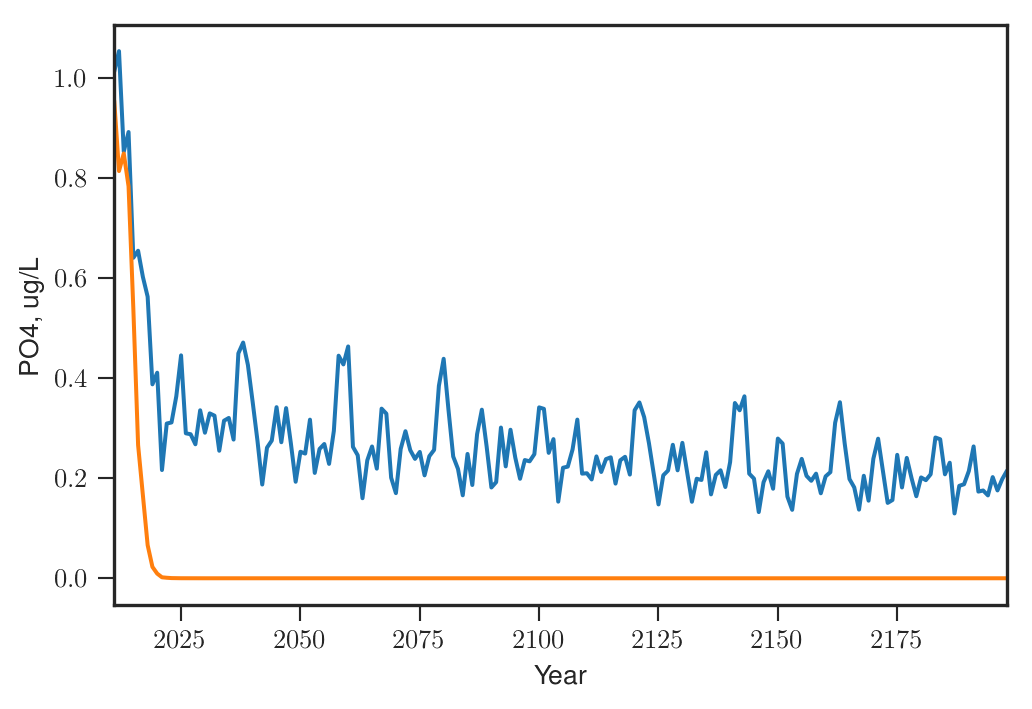

In [32]:
ax = Phy[Phy.Year>2010].groupby(['Year']).mean()[names_scen].plot()
ax = Phy_no_sed[Phy_no_sed.Year>2010].groupby(['Year']).mean()['no sed'].plot()
plt.ylabel('PO4, ug/L')
ax.legend_.remove()

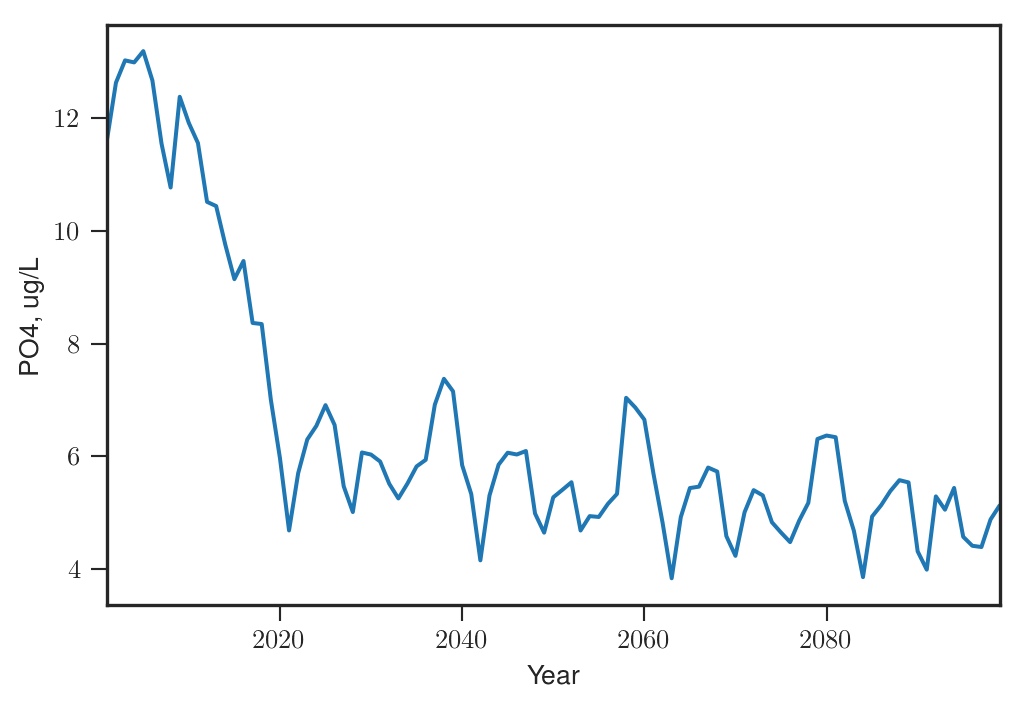

In [33]:
ax = PO4_4m[(PO4_4m.Year>2000) & (PO4_4m.Year<2100)].groupby(['Year']).mean()[names_scen].plot()
plt.ylabel('PO4, ug/L')
ax.legend_.remove()

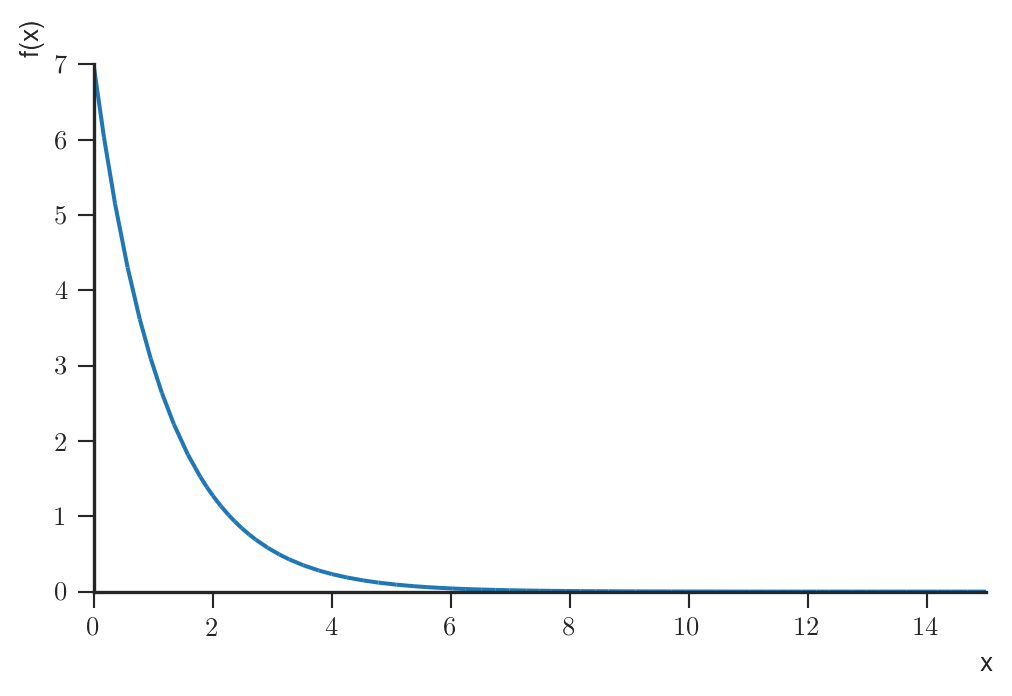

In [34]:
from sympy import symbols, exp
from sympy.plotting import plot

x = symbols('x')
plot(7*exp(-x*0.85), (x, 0, 15))

In [35]:
tau = 0.85
w = tau

In [36]:
# po4_measured = PO4_4m[(PO4_4m.Year>2008) & (PO4_4m.Year<2200)].groupby(['Year']).mean()[names_scen].values
# po4_measured_no_sed = PO4_4m_no_sed[(PO4_4m_no_sed.Year>2008) & (PO4_4m_no_sed.Year<2200)].groupby(['Year']).mean()[['no sed']].values
# phy_measured = Phy_4m[(Phy_4m.Year>2008) & (Phy_4m.Year<2200)].groupby(['Year']).mean()[names_scen].values
# phy_measured_no_sed = Phy_no_sed[(Phy_no_sed.Year>2008) & (Phy_no_sed.Year<2200)].groupby(['Year']).mean()[['no sed']].values
# p_fx_measured = P_fx[(P_fx.Year>2008) & (P_fx.Year<2200)].groupby(['Year']).mean()[names_scen].values

In [56]:
po4_measured = PO4_4m[(PO4_4m.Year>1999) & (PO4_4m.Year<2200)].groupby(['Year']).mean()[names_scen].values
po4_measured_no_sed = PO4_4m_no_sed[(PO4_4m_no_sed.Year>1999) &(PO4_4m_no_sed.Year<2200)].groupby(['Year']).mean()[['no sed']].values
po4_mean_measured = PO4_mean[(PO4_mean.Year>1999) &(PO4_mean.Year<2200)].groupby(['Year']).mean()[names_scen].values
po4_mean_measured_no_sed = PO4_mean_no_sed[(PO4_mean_no_sed.Year>1999) &(PO4_mean_no_sed.Year<2200)].groupby(['Year']).mean()[['no sed']].values
phy_measured = Phy_4m[(Phy_4m.Year>1999) &(Phy_4m.Year<2200)].groupby(['Year']).mean()[names_scen].values
phy_measured_no_sed = Phy_no_sed[(Phy_no_sed.Year>1999) &(Phy_no_sed.Year<2200)].groupby(['Year']).mean()[['no sed']].values
p_fx_measured = P_fx[(P_fx.Year>1999) &(P_fx.Year<2200)].groupby(['Year']).mean()[names_scen].values

In [57]:
PO4_4m[(PO4_4m.Year<2200)].groupby(['Year']).mean()

,P 2016 cutoff,Month,Day,DOY,WOY
Year,,,,,
1985,7.827505,6.526027,15.720548,183.0,26.430137
1986,14.300847,6.526027,15.720548,183.0,26.430137
1987,16.314656,6.526027,15.720548,183.0,27.000000
1988,14.046612,6.513661,15.756831,183.5,26.647541
1989,15.704375,6.526027,15.720548,183.0,26.569863
1990,17.036529,6.526027,15.720548,183.0,26.430137
1991,18.252474,6.526027,15.720548,183.0,26.430137
1992,17.263227,6.513661,15.756831,183.5,26.928962
1993,16.569292,6.526027,15.720548,183.0,26.578082


In [58]:
names_scen

['P 2016 cutoff']

In [59]:
po4_model = {}
for y,s in zip([2050, 2015, 2021,2025,2030,2035,2040,2045,2050],names_scen[2:-1]):
    po4_model[s] = PO4_4m[(PO4_4m.Year>(y-1)) & (PO4_4m.Year<(y+16))].groupby(['Year'])[s].mean().values

In [60]:
PO4_4m[names_scen[-1]].mean()

6.262368035085852

In [61]:
x = np.linspace(0, 15, 100)

for s in names_scen[4:-1]:
    plt.figure()
    plt.plot(x, (po4_model[s][0]-PO4_4m[names_scen[-1]].mean())*np.exp(-x/tau)+PO4_4m[names_scen[-1]].mean(), ':')
    plt.plot(po4_model[s], label=s)
    plt.legend()

(0, 30)

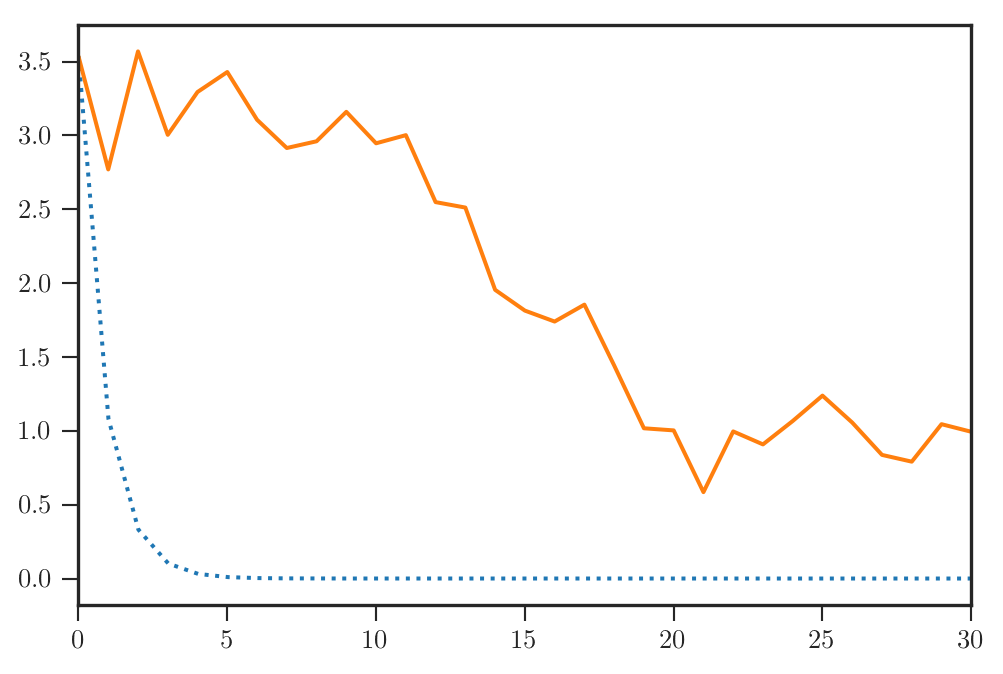

In [62]:
x = np.linspace(0, 150, 150)

plt.plot(x, phy_measured[0]*np.exp(-x/tau), ':')
plt.plot(phy_measured)
plt.xlim(0,30)

In [63]:
tau = 0.85
w = tau

In [64]:
np.argmax(((p_fx_measured[0])*np.exp(-x/tau/140) < (p_fx_measured[0])/2))

82

In [65]:
p_fx_measured[0][0]/2

0.8563646334791047

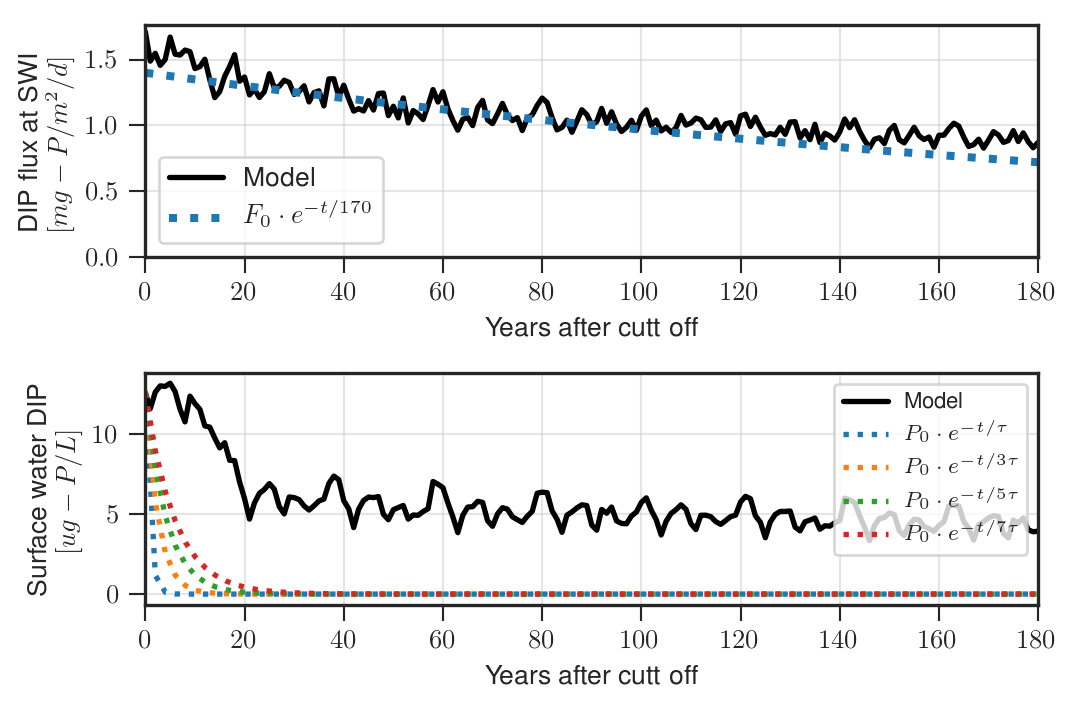

In [66]:
x = np.linspace(0, 200, 200)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,4))

ax1.plot(p_fx_measured, 'k-', lw=2)
ax1.plot(x, 1.4*np.exp(-x/270), ':', lw=3)
# plt.plot(x, (p_fx_measured[0])*np.exp(-x/tau), ':')
ax1.set_ylim(0,None)
# plt.axvline(82, ymin=0,ymax=0.46, c='k', linestyle='-.')
# plt.axhline(p_fx_measured[0][0]/2, xmin=0,xmax=0.82, c='k', linestyle='-.')
ax1.set_ylabel('DIP flux at SWI\n $[mg-P/m^2/d]$')
ax1.set_xlim(0,180)
ax1.grid(alpha=0.5)
ax1.set_xlabel('Years after cutt off')
ax1.legend(['Model',  r'$F_0\cdot e^{-t/170}$'], frameon=1)


x = np.linspace(0, 200, 100)

ax2.plot(po4_measured, 'k-', lw=2)
ax2.plot(x, po4_measured[0]*np.exp(-x/tau), ':', lw=2)
ax2.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
# ax2.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
ax2.plot(x, po4_measured[0]*np.exp(-x/tau/5), ':', lw=2)
ax2.plot(x, po4_measured[0]*np.exp(-x/tau/7), ':', lw=2)
ax2.set_xlim(0,180)
ax2.set_ylabel('Surface water DIP\n $[ug-P/L]$')
ax2.grid(alpha=0.5)
ax2.set_xlabel('Years after cutt off')
ax2.legend(['Model',  r'$P_0\cdot e^{-t/\tau}$',r'$P_0\cdot e^{-t/3\tau}$', r'$P_0\cdot e^{-t/5\tau}$', r'$P_0\cdot e^{-t/7\tau}$'], frameon=1, fontsize='small')


plt.subplots_adjust(wspace=0.3, hspace=0.5)


# savefig('cc/P/P_flux_DIP_surf_combined')

In [67]:
# from sympy.solvers import solve
# from sympy import Symbol
# x = Symbol('x')
# solve(0.8*exp(-x/170)-0.4, x)

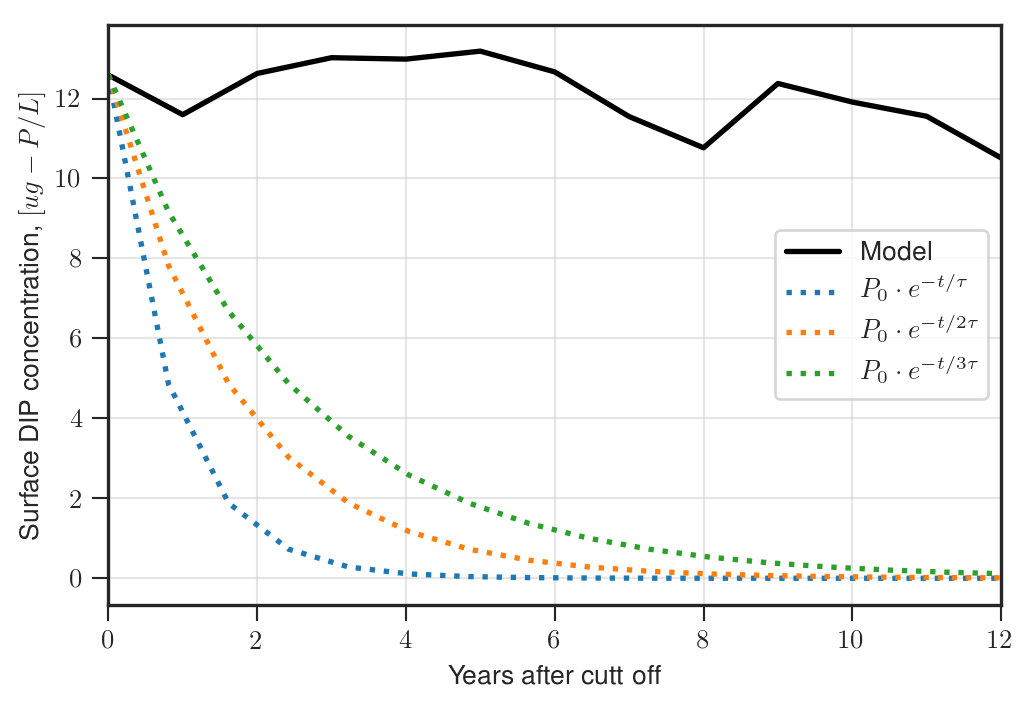

In [68]:
x = np.linspace(0, 80, 100)

plt.plot(po4_measured, 'k-', lw=2)
plt.plot(x, po4_measured[0]*np.exp(-x/tau), ':', lw=2)
plt.plot(x, po4_measured[0]*np.exp(-x/tau/2), ':', lw=2)
plt.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
plt.xlim(0,12)
plt.ylabel('Surface DIP concentration, $[ug-P/L]$')
plt.grid(alpha=0.5)
plt.xlabel('Years after cutt off')
plt.legend(['Model',  r'$P_0\cdot e^{-t/\tau}$',r'$P_0\cdot e^{-t/2\tau}$', r'$P_0\cdot e^{-t/3\tau}$'], frameon=1)


# savefig('cc/P/cutoff_PO4')

In [69]:
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
solve(0.8*exp(-x/330)-0.4, x)

[228.738569584782]

In [70]:
def keys(f):
    return [key for key in f.keys()]

In [71]:
POP_sum = np.mean(np.array(P_gradual_increase_2015_cutoff_to_02000_2030['Sediment_results']['basin1']['concentrations']['POP']),1)*30.973/2.5/1000
PO4ads_sum = np.mean(np.array(P_gradual_increase_2015_cutoff_to_02000_2030['Sediment_results']['basin1']['concentrations']['PO4adsa']),1)*30.973/2.5/1000 
Ca3PO42_sum = np.mean(np.array(P_gradual_increase_2015_cutoff_to_02000_2030['Sediment_results']['basin1']['concentrations']['Ca3PO42']),1)*2*30.973/2.5/1000
Fe3PO42_sum = np.mean(np.array(P_gradual_increase_2015_cutoff_to_02000_2030['Sediment_results']['basin1']['concentrations']['Fe3PO42']),1)*2*30.973/2.5/1000

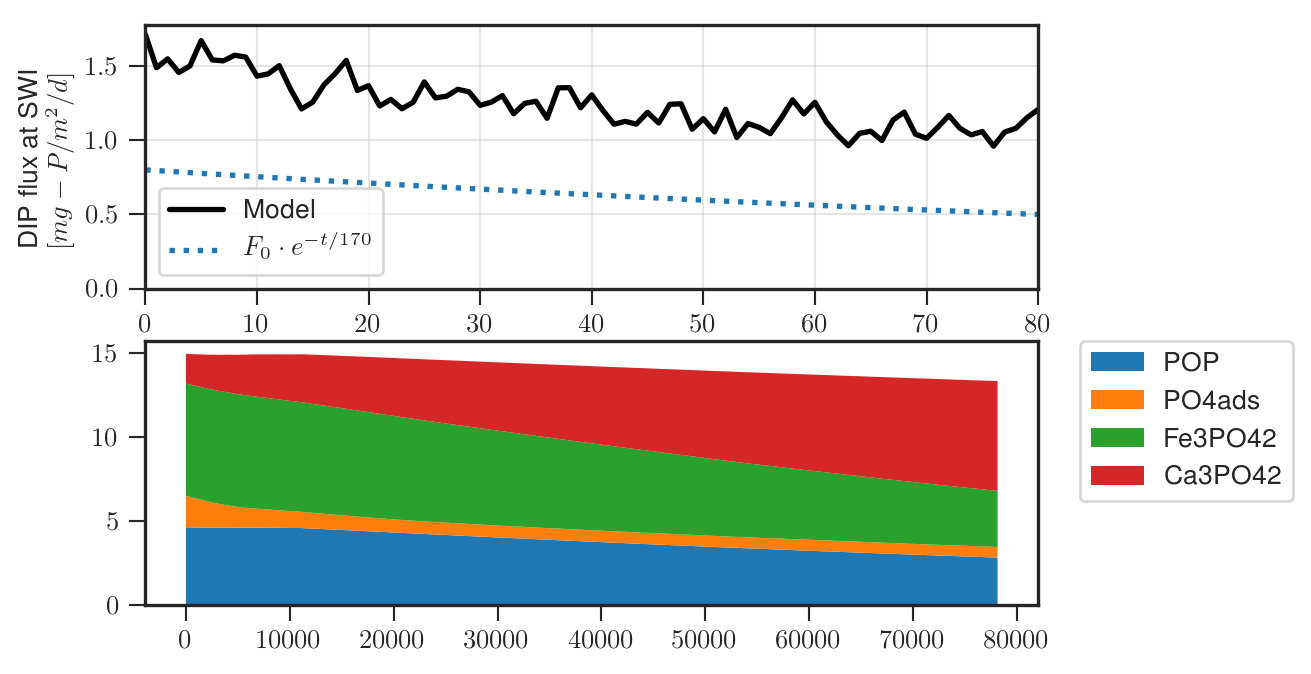

In [72]:
x = np.linspace(0, 100, 100)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,4))

ax1.plot(p_fx_measured, 'k-', lw=2)
ax1.plot(x, 0.8*np.exp(-x/170), ':', lw=2)
# plt.plot(x, (p_fx_measured[0])*np.exp(-x/tau), ':')
ax1.set_ylim(0,None)
# plt.axvline(82, ymin=0,ymax=0.46, c='k', linestyle='-.')
# plt.axhline(p_fx_measured[0][0]/2, xmin=0,xmax=0.82, c='k', linestyle='-.')
ax1.set_ylabel('DIP flux at SWI\n $[mg-P/m^2/d]$')
ax1.set_xlim(0,80)
ax1.grid(alpha=0.5)
ax1.set_xlabel('Years after cutt off')
ax1.legend(['Model',  r'$F_0\cdot e^{-t/170}$'], frameon=1)


solid_p = [POP_sum, PO4ads_sum, Fe3PO42_sum, Ca3PO42_sum]
plt.stackplot(range(len(POP_sum)), *[x for x in solid_p])

plt.legend(['POP', 'PO4ads', 'Fe3PO42', 'Ca3PO42'], bbox_to_anchor=(1.3,1.05), frameon=1)

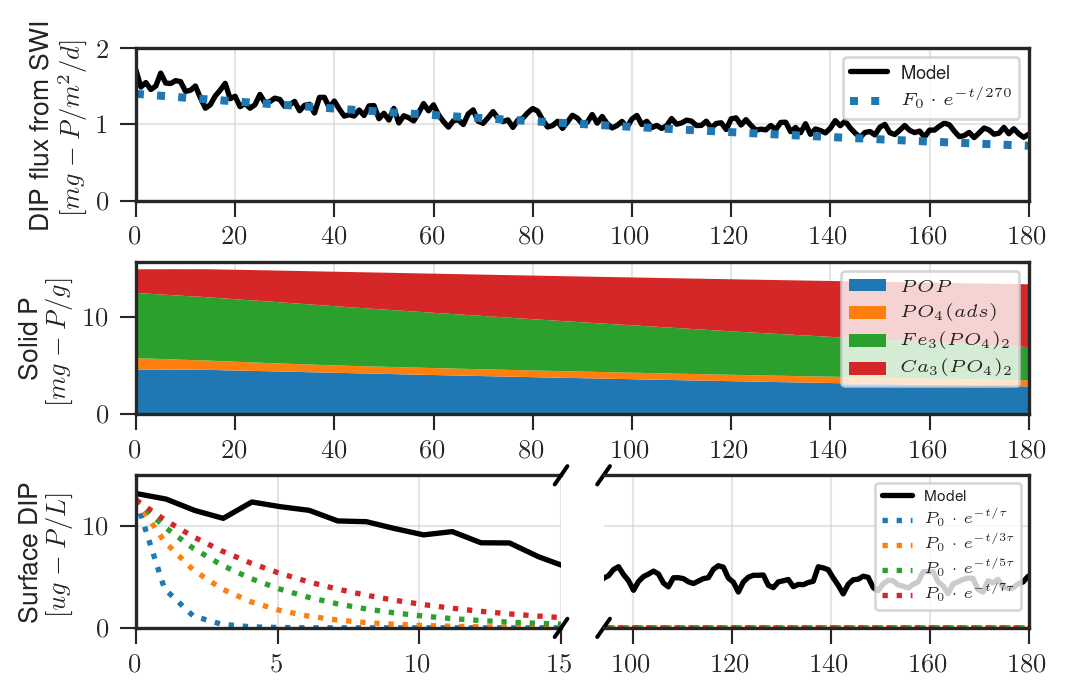

In [73]:
import matplotlib.gridspec as gridspec

x = np.linspace(0, 200, 200)

# fig, (ax1, ax3, ax2) = plt.subplots(3,1, figsize=(6,4), sharex=False)


gs = gridspec.GridSpec(3, 2)

plt.figure(figsize=(6,4))
ax1 = plt.subplot(gs[0, :]) # row 0, col 0
ax3 = plt.subplot(gs[1, :]) # row 0, col 1
ax2 = plt.subplot(gs[2, 0]) # row 1, span all columns
ax4 = plt.subplot(gs[2, 1]) # row 1, span all columns



ax1.plot(p_fx_measured, 'k-', lw=2)
ax1.plot(x, 1.4*np.exp(-x/270), ':', lw=3)
# plt.plot(x, (p_fx_measured[0])*np.exp(-x/tau), ':')
ax1.set_ylim(0,2)
# plt.axvline(82, ymin=0,ymax=0.46, c='k', linestyle='-.')
# plt.axhline(p_fx_measured[0][0]/2, xmin=0,xmax=0.82, c='k', linestyle='-.')
ax1.set_ylabel('DIP flux from SWI\n $[mg-P/m^2/d]$', )
ax1.set_xlim(0,180)

ax1.grid(alpha=0.5)
# ax1.set_xlabel('Years after cutt off')
ax1.legend(['Model',  r'$F_0\cdot e^{-t/270}$'], frameon=1, fontsize='x-small', loc=1)


x = np.linspace(0, 200, len(po4_measured))

ax2.plot(x-5, po4_measured, 'k-', lw=2)
ax2.plot(x, po4_measured[0]*np.exp(-x/tau), ':', lw=2)
ax2.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
# ax2.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
ax2.plot(x, po4_measured[0]*np.exp(-x/tau/5), ':', lw=2)
ax2.plot(x, po4_measured[0]*np.exp(-x/tau/7), ':', lw=2)
ax2.set_xlim(0,15)
ax2.set_ylim(0,15)
ax2.set_ylabel('Surface DIP\n $[ug-P/L]$')
ax2.grid(alpha=0.5)
# ax2.set_xlabel('Years after cutt off')
# ax2.legend(['Model',  r'$P_0\cdot e^{-t/\tau}$',r'$P_0\cdot e^{-t/3\tau}$', r'$P_0\cdot e^{-t/5\tau}$', r'$P_0\cdot e^{-t/7\tau}$'], frameon=1, fontsize='x-small', loc=1)
ax2.spines['right'].set_visible(False)
# ax2.yaxis.tick_top()

ax4.plot(x-5, po4_measured, 'k-', lw=2)
ax4.plot(x, po4_measured[0]*np.exp(-x/tau), ':', lw=2)
ax4.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
# ax2.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
ax4.plot(x, po4_measured[0]*np.exp(-x/tau/5), ':', lw=2)
ax4.plot(x, po4_measured[0]*np.exp(-x/tau/7), ':', lw=2)
ax4.set_xlim(94,180)
ax4.set_ylim(0,15)
# ax4.set_ylabel('Surface water DIP\n $[ug-P/L]$')
ax4.grid(alpha=0.5)
# ax2.set_xlabel('Years after cutt off')
ax4.legend(['Model',  r'$P_0\cdot e^{-t/\tau}$',r'$P_0\cdot e^{-t/3\tau}$', r'$P_0\cdot e^{-t/5\tau}$', r'$P_0\cdot e^{-t/7\tau}$'], frameon=1, fontsize='xx-small', loc=1)

ax4.spines['left'].set_visible(False)
# ax4.tick_params(labelleft='off')
ax4.tick_params(which='both', top='off', left='off', labelleft='off')


# sub_axes = plt.axes([.25, .23, .1, .1])
# sub_axes.plot(po4_measured, 'k-', lw=1)
# sub_axes.plot(x, po4_measured[0]*np.exp(-x/tau), ':', lw=2)
# sub_axes.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
# # ax2.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
# sub_axes.plot(x, po4_measured[0]*np.exp(-x/tau/5), ':', lw=2)
# sub_axes.plot(x, po4_measured[0]*np.exp(-x/tau/7), ':', lw=2)
# sub_axes.set_xlim(0,8)


x = np.linspace(-15*365, 185*365, len(POP_sum))/365

solid_p = [POP_sum, PO4ads_sum, Fe3PO42_sum, Ca3PO42_sum]
ax3.stackplot(x, *[x for x in solid_p])
# ax3.plot(x, POP_sum)
# ax3.plot(x, PO4ads_sum)
# ax3.plot(x, Fe3PO42_sum)
# ax3.plot(x, Ca3PO42_sum)
ax3.set_xlim(0,180)
# ax3.set_ylim(0,20)
ax3.grid(alpha=0.5)
ax3.legend(['$POP$', r'$PO_4(ads)$', r'$Fe_3(PO_4)_2$', '$Ca_3(PO_4)_2$'], fontsize='x-small',frameon=1, loc=1)
ax3.set_ylabel('Solid P \n $[mg-P/g]$')

# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
# axins = zoomed_inset_axes(ax2, 2.5, loc=2) # zoom-factor: 2.5, location: upper-left
# x1, x2, y1, y2 = 0, 10, 0, 10 # specify the limits
# axins.set_xlim(x1, x2) # apply the x-limits
# axins.set_ylim(y1, y2) # apply the y-limits
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax2, axins, loc1=2, loc2=4, fc="none", ec="0.5")



d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax4.transAxes, color='k', clip_on=False)
ax4.plot((-d, +d), (-d*4, +d*4), **kwargs)
ax4.plot((-d, +d), (-d*4+1, +d*4+1), **kwargs)
ax4.plot((-d-0.1, +d-0.1), (-d*4, +d*4), **kwargs)
ax4.plot((-d-0.1, +d-0.1), (-d*4+1, +d*4+1), **kwargs)


plt.subplots_adjust(wspace=0.1, hspace=0.4)


# savefig('cc/P/P_flux_DIP_surf_combined')

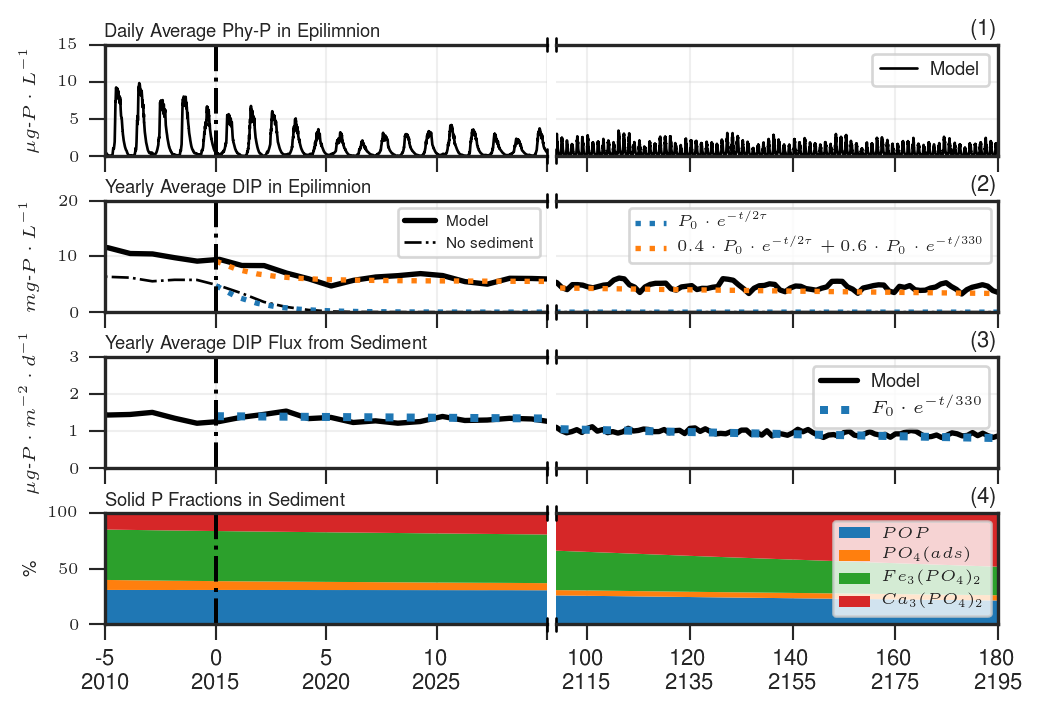

In [233]:
import matplotlib.gridspec as gridspec

x = np.linspace(0, 200, 200)


plt.figure(figsize=(6,4))


gs = gridspec.GridSpec(4, 2)

ax5 = plt.subplot(gs[0, 0]) # row 0, col 0
ax5r = plt.subplot(gs[0, 1]) # row 0, col 0
ax2 = plt.subplot(gs[1, 0]) # row 0, col 1
ax4 = plt.subplot(gs[1, 1]) # row 1, span all columns
ax1 = plt.subplot(gs[2, 0]) # row 1, span all columns
ax1r = plt.subplot(gs[2, 1]) # row 1, span all columns
ax3 = plt.subplot(gs[3, 0]) # row 1, span all columns
ax3r = plt.subplot(gs[3, 1]) # row 1, span all columns


x = np.linspace(-15, 185, len(p_fx_measured))
ax1.plot(x, p_fx_measured, 'k-', lw=2)

x = np.linspace(0, 185, 300)
ax1.plot(x, 1.4*np.exp(-x/330), ':', lw=3)
ax1.set_ylim(0,3)
ax1.set_ylabel('$\mu g$-$P\cdot m^{-2}\cdot d^{-1}$', fontsize='x-small')
ax1.set_xlim(-5,14)
ax1.grid(alpha=0.5)
ax1.spines['right'].set_visible(False)




ax1r.plot(p_fx_measured, 'k-', lw=2)
ax1r.plot(x, 1.4*np.exp(-x/330), ':', lw=3)
ax1r.set_ylim(0,3)
ax1r.set_xlim(94,180)
ax1r.grid(alpha=0.5)
ax1r.legend(['Model',  r'$F_0\cdot e^{-t/330}$'], frameon=1, fontsize='x-small', loc=1)
ax1r.spines['left'].set_visible(False)
ax1r.tick_params(which='both', top='off', left='off', labelleft='off')



x = np.linspace(-15, 185, len(po4_measured))
ax2.plot(x-1, po4_measured, 'k-', lw=2)
ax2.plot(x, po4_measured_no_sed, 'k-.', lw=1)
x = np.linspace(0, 185, len(po4_measured))
# ax2.plot(x, 0.85*po4_measured[5]*np.exp(-x/tau), ':', lw=2)
ax2.plot(x, po4_measured_no_sed[15]*np.exp(-x/tau/2), ':', lw=2)
# ax2.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
ax2.plot(x, 0.37*po4_measured[15]*np.exp(-x/tau/2)+0.63*po4_measured[15]*np.exp(-x/330), ':', lw=2)
# ax2.plot(x, po4_measured[15]*np.exp(-x/tau/3), ':', lw=2)
# ax2.plot(x, po4_measured[5]*np.exp(-x/tau/7), ':', lw=2)
ax2.set_xlim(-5,14)
ax2.set_ylim(0,20)
ax2.set_ylabel('$mg$-$P\cdot L^{-1}$', fontsize='x-small')
ax2.grid(alpha=0.5)
# ax2.set_xlabel('Years after cutt off')
# ax2.legend(['Model',  r'$P_0\cdot e^{-t/\tau}$',r'$P_0\cdot e^{-t/3\tau}$', r'$P_0\cdot e^{-t/5\tau}$', r'$P_0\cdot e^{-t/7\tau}$'], frameon=1, fontsize='x-small', loc=1)
ax2.spines['right'].set_visible(False)
# ax2.yaxis.tick_top()
ax2.legend(['Model', 'No sediment'], frameon=1, fontsize='xx-small', loc=1) #, r'$P_0\cdot e^{-t/5\tau}$', r'$P_0\cdot e^{-t/7\tau}$'], frameon=1, fontsize='xx-small', loc=1)

x = np.linspace(-15, 185, len(po4_measured))
ax4.plot(x-1, po4_measured, 'k-', lw=2)
ax4.plot(x, po4_measured_no_sed, 'k-.', lw=1)
x = np.linspace(0, 185, len(po4_measured))
# ax4.plot(x, po4_measured[5]*np.exp(-x/tau), ':', lw=2)
l3, = ax4.plot(x, po4_measured_no_sed[15]*np.exp(-x/tau/2), ':', lw=2)
# ax2.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
l4, = ax4.plot(x, 0.37*po4_measured[15]*np.exp(-x/tau/2)+0.63*po4_measured[15]*np.exp(-x/330), ':', lw=2)
# ax4.plot(x, po4_measured[15]*np.exp(-x/tau/3), ':', lw=2)
# ax4.plot(x, po4_measured[5]*np.exp(-x/tau/7), ':', lw=2)
ax4.set_xlim(94,180)
ax4.set_ylim(0,20)
# ax4.set_ylabel('Surface water DIP\n $[ug-P/L]$')
ax4.grid(alpha=0.5)
# ax2.set_xlabel('Years after cutt off')
# ax4.legend(['Model', 'No sediment', r'$P_0\cdot e^{-t/\tau}$',r'$P_0\cdot e^{-t/3\tau}$', r'$P_0\cdot e^{-t/5\tau}$', r'$P_0\cdot e^{-t/7\tau}$'], frameon=1, fontsize='xx-small', loc=1)
ax4.legend([l3,l4],[r'$P_0\cdot e^{-t/2\tau}$',r'$0.4 \cdot P_0\cdot e^{-t/2\tau} + 0.6 \cdot P_0\cdot e^{-t/330}$'], frameon=1, fontsize='xx-small', loc=1) #, r'$P_0\cdot e^{-t/5\tau}$', r'$P_0\cdot e^{-t/7\tau}$'], frameon=1, fontsize='xx-small', loc=1)

ax4.spines['left'].set_visible(False)
# ax4.tick_params(labelleft='off')
ax4.tick_params(which='both', top='off', left='off', labelleft='off')


# sub_axes = plt.axes([.25, .23, .1, .1])
# sub_axes.plot(po4_measured, 'k-', lw=1)
# sub_axes.plot(x, po4_measured[0]*np.exp(-x/tau), ':', lw=2)
# sub_axes.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
# # ax2.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
# sub_axes.plot(x, po4_measured[0]*np.exp(-x/tau/5), ':', lw=2)
# sub_axes.plot(x, po4_measured[0]*np.exp(-x/tau/7), ':', lw=2)
# sub_axes.set_xlim(0,8)


x = np.linspace(-15*365, 185*365, len(POP_sum))/365

solid_p = [POP_sum, PO4ads_sum, Fe3PO42_sum, Ca3PO42_sum]
ax3.stackplot(x, *[100*x/sum(solid_p) for x in solid_p])
ax3.set_xlim(-5,14)
ax3.set_ylim(0,100)
ax3.grid(alpha=0.5)
# ax3.legend(['$POP$', r'$PO_4(ads)$', r'$Fe_3(PO_4)_2$', '$Ca_3(PO_4)_2$'], fontsize='x-small',frameon=1, loc=1)
ax3.set_ylabel('\%', fontsize='x-small')
ax3.spines['right'].set_visible(False)

ax3r.stackplot(x, *[100*x/sum(solid_p) for x in solid_p])
ax3r.set_xlim(94,180)
ax3r.set_ylim(0,100)
ax3r.grid(alpha=0.5)
ax3r.legend(['$POP$', r'$PO_4(ads)$', r'$Fe_3(PO_4)_2$', '$Ca_3(PO_4)_2$'], fontsize='xx-small',frameon=1, loc=1)
ax3r.spines['left'].set_visible(False)
ax3r.tick_params(which='both', top='off', left='off', labelleft='off')



x = np.linspace(-15, 185, len(Phy_4m[Phy_4m.Year>1999][names_scen].values))
# ax5.plot(x, phy_measured, 'k-', lw=2, label='Model')
# ax5.plot(x, phy_measured_no_sed, 'k-.', lw=1, label='No sediment')
ax5.plot(x, Phy_4m[Phy_4m.Year>1999][names_scen].values, 'k-', lw=1, label='Model')
# ax5.plot(x[:-335], Phy_no_sed['no sed'].values, 'r-', lw=1)
ax5.set_xlim(-5,14)
ax5.set_ylim(0,15)
ax5.grid(alpha=0.5)
# ax5.set_ylim(0,None)
ax5.spines['right'].set_visible(False)
ax5.set_ylabel('$\mu g$-$P\cdot L^{-1}$', fontsize='x-small')

ax5r.plot(x, Phy_4m[Phy_4m.Year>1999][names_scen].values, 'k-', lw=1, label='Model')
# ax5r.plot(x, phy_measured, 'k-', lw=2, label='Model')
# ax5r.plot(x, phy_measured_no_sed, 'k-.', lw=1, label='No sediment')
ax5r.set_xlim(94,180)
ax5r.set_ylim(0,15)
ax5r.grid(alpha=0.5)
# ax5r.set_ylim(0,None)
ax5r.spines['left'].set_visible(False)
ax5r.tick_params(which='both', top='off', left='off', labelleft='off')
ax5r.legend(fontsize='x-small',frameon=1, loc=1)



d = .015  # how big to make the diagonal lines in axes coordinates



for ax in [ax5r, ax4, ax3r, ax1r]:
    kwargs = dict(transform=ax.transAxes, lw=1, color='k', clip_on=False)
    ax.plot((-0, +0), (-d*4, +d*4), **kwargs)
    ax.plot((-0, +0), (-d*4+1, +d*4+1), **kwargs)
    ax.plot((-0-.02, +0-0.02), (-d*4, +d*4), **kwargs)
    ax.plot((-0-.02, +0-0.02), (-d*4+1, +d*4+1), **kwargs)
    ax.tick_params(axis='y',labelsize='xx-small')
    
    
for ax in [ax1, ax2, ax3, ax5]:
    ax.axvline(0, color='k', linestyle='-.')
    ax.tick_params(axis='y',labelsize='xx-small')
    ax.set_xlim(-5,15)

    
for ax in [ax1, ax2, ax5, ax4, ax5r, ax1r]:
    ax.tick_params(which='both', labelbottom='off') 
    ax.get_yaxis().set_label_coords(-0.15,0.5)
    ax.tick_params(axis='y',labelsize='xx-small')
    ax.set_ylim(0,None)
    ax.grid(alpha=0.3)
    
    
ax3.get_yaxis().set_label_coords(-0.15,0.5)
    
# ax3.text(14, -70, 'Year', ha='center')
    
plt.subplots_adjust(wspace=0.02, hspace=0.4)

x = np.linspace(-15*365, 185*365, len(POP_sum))/365

ax3.set_xticklabels(['-5\n2010','0\n2015','5\n2020','10\n2025'], fontsize='small')
ax3r.set_xticklabels(['80\n2095','100\n2115','120\n2135','140\n2155','160\n2175', '180\n2195'], fontsize='small')



ax5.text(0.0,1.03, 'Daily Average Phy-P in Epilimnion', fontsize='x-small', horizontalalignment='left', verticalalignment='bottom', transform = ax5.transAxes)
ax1.text(0.0,1.03, 'Yearly Average DIP Flux from Sediment', fontsize='x-small', horizontalalignment='left', verticalalignment='bottom', transform = ax1.transAxes)
ax2.text(0.0,1.03, 'Yearly Average DIP in Epilimnion', fontsize='x-small', horizontalalignment='left', verticalalignment='bottom', transform = ax2.transAxes)
ax3.text(0.0,1.03, 'Solid P Fractions in Sediment', fontsize='x-small', horizontalalignment='left', verticalalignment='bottom', transform = ax3.transAxes)

ax5.text(1.0,1.04, '(1)', fontsize='small', horizontalalignment='right', verticalalignment='bottom', transform = ax5r.transAxes)
ax1r.text(1.,1.04, '(3)', fontsize='small', horizontalalignment='right', verticalalignment='bottom', transform = ax1r.transAxes)
ax4.text(1.,1.04, '(2)', fontsize='small', horizontalalignment='right', verticalalignment='bottom', transform = ax4.transAxes)
ax3r.text(1.,1.04, '(4)', fontsize='small', horizontalalignment='right', verticalalignment='bottom', transform = ax3r.transAxes)


# savefig('cc/P/P_flux_DIP_surf_combined_8')

In [ ]:
import matplotlib.gridspec as gridspec

x = np.linspace(0, 200, 200)

# fig, (ax1, ax3, ax2) = plt.subplots(3,1, figsize=(6,4), sharex=False)


fig = plt.figure(figsize=(9,4), dpi=90)

outer = gridspec.GridSpec(1, 2, wspace = 0.2) 
#make nested gridspecs
gs = gridspec.GridSpecFromSubplotSpec(3, 2, subplot_spec = outer[0], hspace=0.3)
gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[1], hspace = .2)

# grid = plt.GridSpec(1, 5, hspace=0.2, wspace=0.5)

# ax0 = fig.add_subplot(gs1[0, 0])
# ax1 = fig.add_subplot(gs1[0, 1], )
# ax2 = fig.add_subplot(gs1[0, 2], )
# ax3 = fig.add_subplot(gs2[0, 0])



# gs = gridspec.GridSpec(3, 2)

# plt.figure(figsize=(6,5))
ax5 = plt.subplot(gs[0, 0]) # row 0, col 0
ax5r = plt.subplot(gs[0, 1]) # row 0, col 0
# ax2 = plt.subplot(gs[1, 0]) # row 0, col 1
# ax4 = plt.subplot(gs[1, 1]) # row 1, span all columns
ax1 = plt.subplot(gs[1, 0]) # row 1, span all columns
ax1r = plt.subplot(gs[1, 1]) # row 1, span all columns
ax3 = plt.subplot(gs[2, 0]) # row 1, span all columns
ax3r = plt.subplot(gs[2, 1]) # row 1, span all columns

ax2 = plt.subplot(gs2[0, 0])

x = np.linspace(-15, 185, len(p_fx_measured))
ax1.plot(x, p_fx_measured, 'k-', lw=2)

x = np.linspace(0, 185, 300)
ax1.plot(x, 1.4*np.exp(-x/330), ':', lw=3)
ax1.set_ylim(0,3)
ax1.set_ylabel('$\mu g$-$P\cdot m^{-2}\cdot d^{-1}$', fontsize='x-small')
ax1.set_xlim(-5,14)
ax1.grid(alpha=0.5)
ax1.spines['right'].set_visible(False)




ax1r.plot(p_fx_measured, 'k-', lw=2)
ax1r.plot(x, 1.4*np.exp(-x/330), ':', lw=3)
ax1r.set_ylim(0,3)
ax1r.set_xlim(94,180)
ax1r.grid(alpha=0.5)
ax1r.legend(['Model',  r'$F_0\cdot e^{-t/330}$'], frameon=1, fontsize='x-small', loc=1)
ax1r.spines['left'].set_visible(False)
ax1r.tick_params(which='both', top='off', left='off', labelleft='off')



x = np.linspace(-15, 185, len(po4_measured))
ax2.plot(x-1, po4_measured, 'k-', lw=2)
ax2.plot(x, po4_measured_no_sed, 'k-.', lw=1)
x = np.linspace(0, 185, len(po4_measured))
# ax2.plot(x, 0.85*po4_measured[5]*np.exp(-x/tau), ':', lw=2)
ax2.plot(x, po4_measured_no_sed[15]*np.exp(-x/tau/2), ':', lw=2)
# ax2.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
ax2.plot(x, 0.37*po4_measured[15]*np.exp(-x/tau/2)+0.63*po4_measured[15]*np.exp(-x/330), ':', lw=2)
# ax2.plot(x, po4_measured[15]*np.exp(-x/tau/3), ':', lw=2)
# ax2.plot(x, po4_measured[5]*np.exp(-x/tau/7), ':', lw=2)
ax2.set_xlim(-5,14)
ax2.set_ylim(0,20)
ax2.set_ylabel('$mg$-$P\cdot L^{-1}$', fontsize='x-small')
ax2.grid(alpha=0.5)
# ax2.set_xlabel('Years after cutt off')
# ax2.legend(['Model',  r'$P_0\cdot e^{-t/\tau}$',r'$P_0\cdot e^{-t/3\tau}$', r'$P_0\cdot e^{-t/5\tau}$', r'$P_0\cdot e^{-t/7\tau}$'], frameon=1, fontsize='x-small', loc=1)
# ax2.spines['right'].set_visible(False)
# ax2.yaxis.tick_top()

x = np.linspace(-15, 185, len(po4_measured))
ax4.plot(x-1, po4_measured, 'k-', lw=2)
ax4.plot(x, po4_measured_no_sed, 'k-.', lw=1)
x = np.linspace(0, 185, len(po4_measured))
# ax4.plot(x, po4_measured[5]*np.exp(-x/tau), ':', lw=2)
ax4.plot(x, po4_measured_no_sed[15]*np.exp(-x/tau/2), ':', lw=2)
# ax2.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
ax4.plot(x, 0.4*po4_measured[15]*np.exp(-x/tau/2)+0.6*po4_measured[15]*np.exp(-x/330), ':', lw=2)
# ax4.plot(x, po4_measured[15]*np.exp(-x/tau/3), ':', lw=2)
# ax4.plot(x, po4_measured[5]*np.exp(-x/tau/7), ':', lw=2)
ax4.set_xlim(94,180)
ax4.set_ylim(0,20)
# ax4.set_ylabel('Surface water DIP\n $[ug-P/L]$')
ax4.grid(alpha=0.5)
# ax2.set_xlabel('Years after cutt off')
# ax4.legend(['Model', 'No sediment', r'$P_0\cdot e^{-t/\tau}$',r'$P_0\cdot e^{-t/3\tau}$', r'$P_0\cdot e^{-t/5\tau}$', r'$P_0\cdot e^{-t/7\tau}$'], frameon=1, fontsize='xx-small', loc=1)
ax4.legend(['Model', 'No sediment', r'$P_0\cdot e^{-t/2\tau}$',r'$0.4 \cdot P_0\cdot e^{-t/2\tau} + 0.6 \cdot P_0\cdot e^{-t/330}$'], frameon=1, fontsize='xx-small', loc=1) #, r'$P_0\cdot e^{-t/5\tau}$', r'$P_0\cdot e^{-t/7\tau}$'], frameon=1, fontsize='xx-small', loc=1)

ax4.spines['left'].set_visible(False)
# ax4.tick_params(labelleft='off')
ax4.tick_params(which='both', top='off', left='off', labelleft='off')


# sub_axes = plt.axes([.25, .23, .1, .1])
# sub_axes.plot(po4_measured, 'k-', lw=1)
# sub_axes.plot(x, po4_measured[0]*np.exp(-x/tau), ':', lw=2)
# sub_axes.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
# # ax2.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
# sub_axes.plot(x, po4_measured[0]*np.exp(-x/tau/5), ':', lw=2)
# sub_axes.plot(x, po4_measured[0]*np.exp(-x/tau/7), ':', lw=2)
# sub_axes.set_xlim(0,8)


x = np.linspace(-15*365, 185*365, len(POP_sum))/365

solid_p = [POP_sum, PO4ads_sum, Fe3PO42_sum, Ca3PO42_sum]
ax3.stackplot(x, *[100*x/sum(solid_p) for x in solid_p])
ax3.set_xlim(-5,14)
ax3.set_ylim(0,100)
ax3.grid(alpha=0.5)
# ax3.legend(['$POP$', r'$PO_4(ads)$', r'$Fe_3(PO_4)_2$', '$Ca_3(PO_4)_2$'], fontsize='x-small',frameon=1, loc=1)
ax3.set_ylabel('\%', fontsize='x-small')
ax3.spines['right'].set_visible(False)

ax3r.stackplot(x, *[100*x/sum(solid_p) for x in solid_p])
ax3r.set_xlim(94,180)
ax3r.set_ylim(0,100)
ax3r.grid(alpha=0.5)
ax3r.legend(['$POP$', r'$PO_4(ads)$', r'$Fe_3(PO_4)_2$', '$Ca_3(PO_4)_2$'], fontsize='xx-small',frameon=1, loc=1)
ax3r.spines['left'].set_visible(False)
ax3r.tick_params(which='both', top='off', left='off', labelleft='off')



x = np.linspace(-15, 185, len(Phy_4m[Phy_4m.Year>1999][names_scen].values))
# ax5.plot(x, phy_measured, 'k-', lw=2, label='Model')
# ax5.plot(x, phy_measured_no_sed, 'k-.', lw=1, label='No sediment')
ax5.plot(x, Phy_4m[Phy_4m.Year>1999][names_scen].values, 'k-', lw=1, label='Model')
# ax5.plot(x[:-335], Phy_no_sed['no sed'].values, 'r-', lw=1)
ax5.set_xlim(-5,14)
ax5.set_ylim(0,15)
ax5.grid(alpha=0.5)
# ax5.set_ylim(0,None)
ax5.spines['right'].set_visible(False)
ax5.set_ylabel('$\mu g$-$P\cdot L^{-1}$', fontsize='x-small')

ax5r.plot(x, Phy_4m[Phy_4m.Year>1999][names_scen].values, 'k-', lw=1, label='Model')
# ax5r.plot(x, phy_measured, 'k-', lw=2, label='Model')
# ax5r.plot(x, phy_measured_no_sed, 'k-.', lw=1, label='No sediment')
ax5r.set_xlim(94,180)
ax5r.set_ylim(0,15)
ax5r.grid(alpha=0.5)
# ax5r.set_ylim(0,None)
ax5r.spines['left'].set_visible(False)
ax5r.tick_params(which='both', top='off', left='off', labelleft='off')
ax5r.legend(fontsize='x-small',frameon=1, loc=1)



d = .015  # how big to make the diagonal lines in axes coordinates



for ax in [ax5r, ax4, ax3r, ax1r]:
    kwargs = dict(transform=ax.transAxes, lw=1, color='k', clip_on=False)
    ax.plot((-0, +0), (-d*4, +d*4), **kwargs)
    ax.plot((-0, +0), (-d*4+1, +d*4+1), **kwargs)
    ax.plot((-0-.02, +0-0.02), (-d*4, +d*4), **kwargs)
    ax.plot((-0-.02, +0-0.02), (-d*4+1, +d*4+1), **kwargs)
    ax.tick_params(axis='y',labelsize='xx-small')
    
    
for ax in [ax1, ax2, ax3, ax5]:
    ax.axvline(0, color='k', linestyle='-.')
    ax.tick_params(axis='y',labelsize='xx-small')
    ax.set_xlim(-5,15)

    
for ax in [ax1, ax5, ax4, ax5r, ax1r]:
    ax.tick_params(which='both', labelbottom='off') 
    ax.get_yaxis().set_label_coords(-0.25,0.5)
    ax.tick_params(axis='y',labelsize='xx-small')
    ax.set_ylim(0,None)
    ax.grid(alpha=0.3)
    
    
ax3.get_yaxis().set_label_coords(-0.25,0.5)
    
# ax3.text(14, -72, 'Year', ha='center', fontsize='small')
# ax3.text(64, -72, 'Year', ha='center', fontsize='small')
    
plt.subplots_adjust(wspace=0.02, hspace=0.4)

x = np.linspace(-15*365, 185*365, len(POP_sum))/365

ax3.set_xticks([-5,0, 5, 10])
ax3r.set_xticks([100,140,180])
ax3.set_xticklabels(['-5\n2010','0\n2015','5\n2020','10\n2025'], fontsize='x-small')
ax3r.set_xticklabels(['100\n2115','140\n2155', '180\n2195'], fontsize='x-small')



ax5.text(-0.0,1.03, 'Daily Average Phy-P in Epilimnion', fontsize='xx-small', horizontalalignment='left', verticalalignment='bottom', transform = ax5.transAxes)
ax1.text(0.0,1.03, 'Yearly Average DIP Flux from Sed.', fontsize='xx-small', horizontalalignment='left', verticalalignment='bottom', transform = ax1.transAxes)
ax2.text(0.0,1.01, 'Yearly Average DIP in Epilimnion', fontsize='xx-small', horizontalalignment='left', verticalalignment='bottom', transform = ax2.transAxes)
ax3.text(0.0,1.03, 'Solid P Fractions in Sediment', fontsize='xx-small', horizontalalignment='left', verticalalignment='bottom', transform = ax3.transAxes)

ax5.text(1.0,1.04, '(1)', fontsize='small', horizontalalignment='right', verticalalignment='bottom', transform = ax5r.transAxes)
ax1r.text(1.,1.04, '(2)', fontsize='small', horizontalalignment='right', verticalalignment='bottom', transform = ax1r.transAxes)
ax2.text(1.,1.01, '(4)', fontsize='small', horizontalalignment='right', verticalalignment='bottom', transform = ax2.transAxes)
ax3r.text(1.,1.04, '(3)', fontsize='small', horizontalalignment='right', verticalalignment='bottom', transform = ax3r.transAxes)

ax2.set_xlim(0,80)
ax2.set_ylim(0,12.)
ax2.get_yaxis().set_label_coords(-0.1,0.5)
ax2.legend(['Model', 'No sediment', r'$P_0\cdot e^{-t/2\tau}$',r'$0.4 \cdot P_0\cdot e^{-t/2\tau} + 0.6 \cdot P_0\cdot e^{-t/330}$'], frameon=1, fontsize='x-small', loc=1) #, r'$P_0\cdot e^{-t/5\tau}$', r'$P_0\cdot e^{-t/7\tau}$'], frameon=1, fontsize='xx-small', loc=1)

ax2.set_xticklabels(['0\n2015','20\n2035','40\n2055','60\n2075','80\n2095'], fontsize='x-small')




plt.tight_layout()

# savefig('cc/P/P_flux_DIP_surf_combined_9')


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [75]:
330/tau

388.2352941176471

In [210]:
330*np.log(2)

228.73856958478194

In [76]:
((po4_mean_measured[:15]-po4_mean_measured_no_sed[:15])/po4_mean_measured[:15]).mean()

0.6062805633254889

(0, 75)

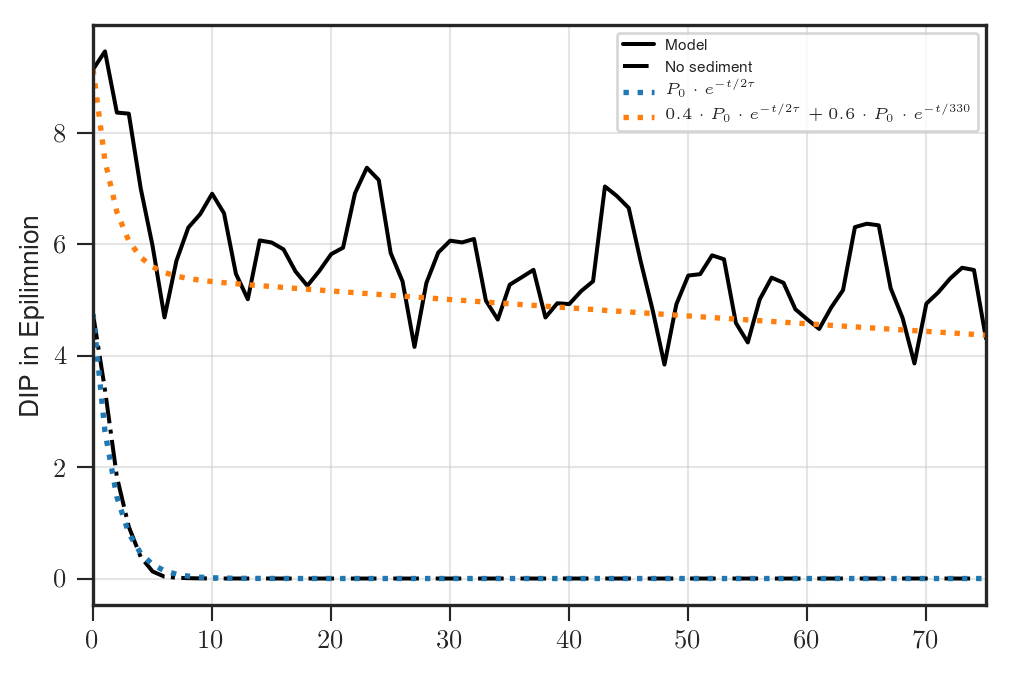

In [113]:
plt.plot(po4_measured[15:], 'k-')
plt.plot(po4_measured_no_sed[15:], 'k-.')
x = np.linspace(0, 200, 201)
plt.plot(x, po4_measured_no_sed[15]*np.exp(-x/tau/2), ':', lw=2)
plt.plot(x, 0.4*(po4_measured[15]+po4_measured[15])/2*np.exp(-x/tau/2)+0.6*(po4_measured[15]+po4_measured[15])/2*np.exp(-x/330), ':', lw=2)
# plt.plot(x, 0.47*(po4_measured[15]+po4_measured[15])/2*np.exp(-x/tau/2)+0.53*(po4_measured[15]+po4_measured[15])/2*np.exp(-x/330), ':', lw=2)
plt.legend(['Model', 'No sediment', r'$P_0\cdot e^{-t/2\tau}$',r'$0.4 \cdot P_0\cdot e^{-t/2\tau} + 0.6 \cdot P_0\cdot e^{-t/330}$', r'$0.47 \cdot P_0\cdot e^{-t/2\tau} + 0.53 \cdot P_0\cdot e^{-t/330}$'], frameon=1, fontsize='xx-small', loc=1) #, r'$P_0\cdot e^{-t/5\tau}$', r'$P_0\cdot e^{-t/7\tau}$'], frameon=1, fontsize='xx-small', loc=1)
plt.grid(alpha=0.5)
plt.ylabel('DIP in Epilimnion')
plt.xlim(0,75)

(2010, 2020)

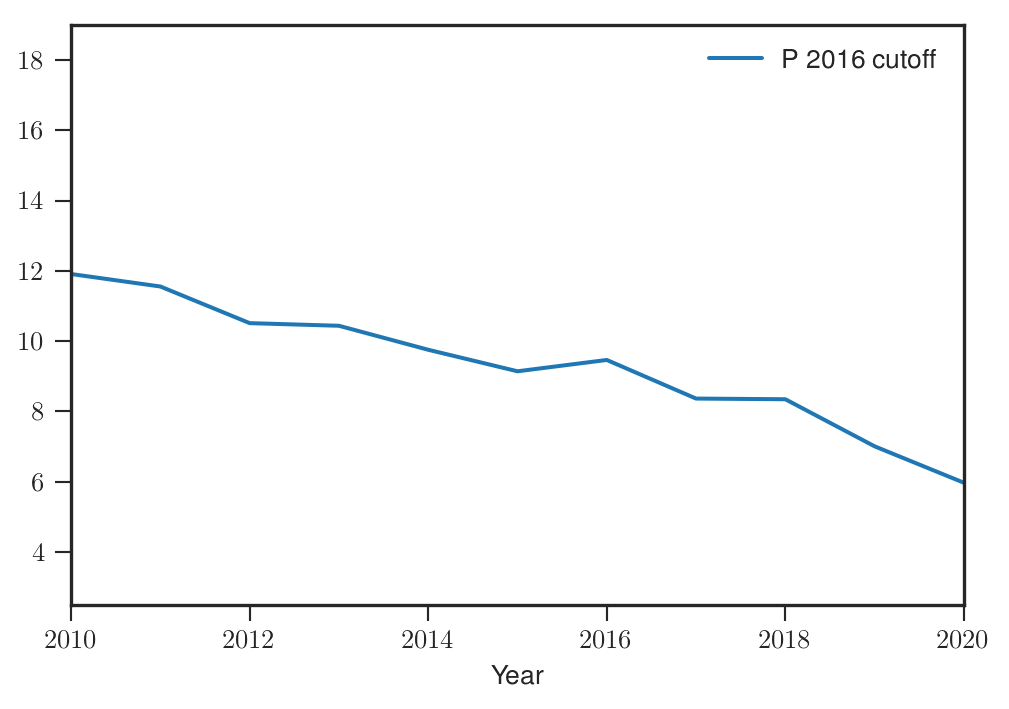

In [112]:
PO4_4m.groupby('Year').mean()[names_scen].plot()
plt.xlim(2010,2020)

In [78]:
1.7/(1.7+1.9)

0.47222222222222227

In [79]:
(po4_mean_measured_no_sed[:15]).mean()/(po4_mean_measured[:15]).mean()

0.39109647824160176

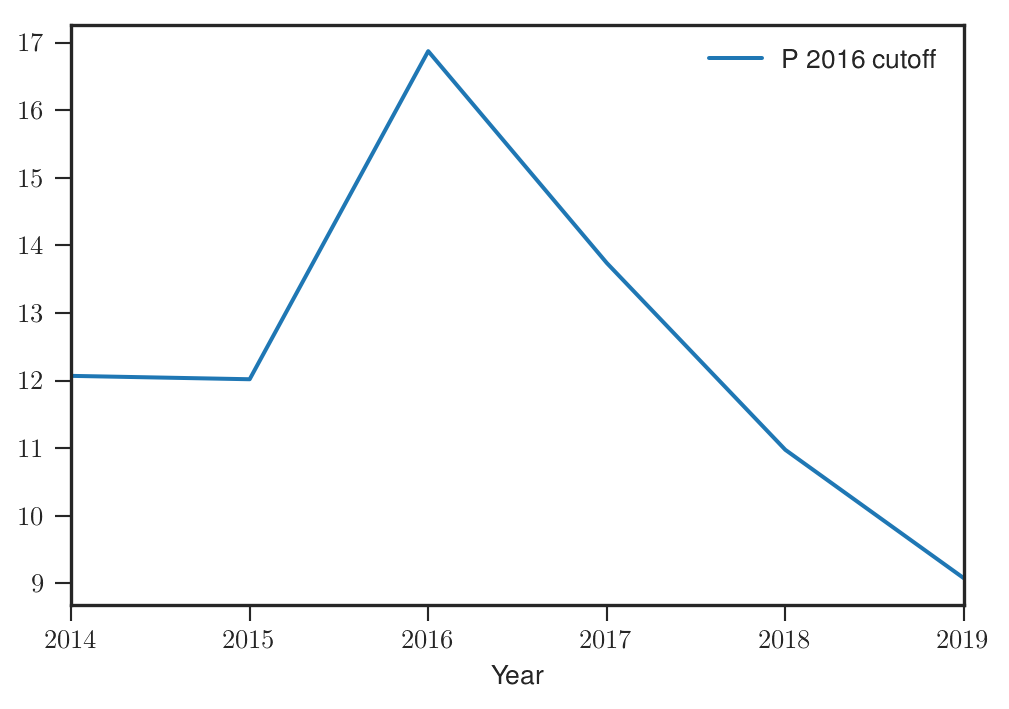

In [80]:
PO4_mean[(PO4_mean.Year>2013) & (PO4_mean.Year<2020)].groupby('Year').mean()[names_scen].plot()

In [81]:
# plt.plot(Phy_rate[names_scen].values)
# # plt.xlim(0,30)
# plt.ylim(0,None)

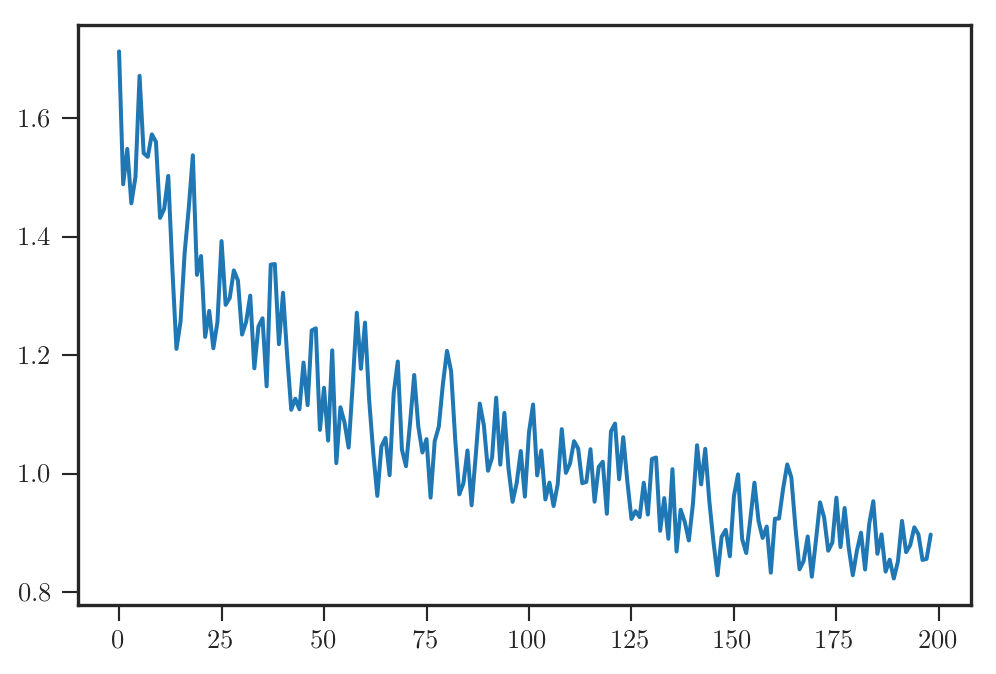

In [82]:
plt.plot(p_fx_measured)
# plt.xlim(0,50)

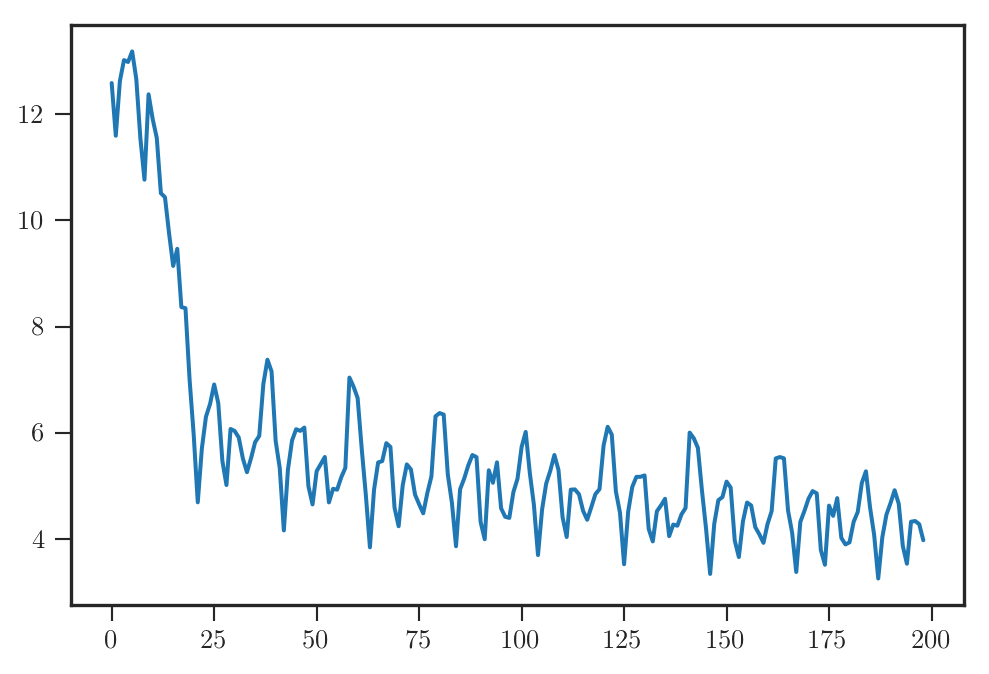

In [83]:
plt.plot(po4_measured)

(0, 9.398482172141456)

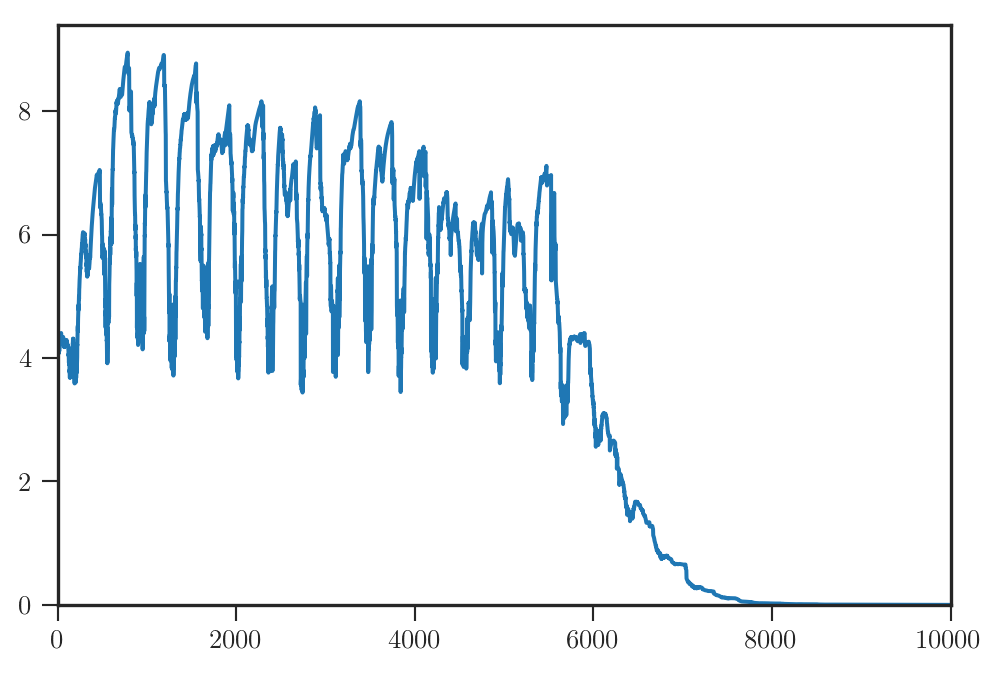

In [84]:
plt.plot(PO4_4m_no_sed['no sed'].index, PO4_4m_no_sed['no sed'].values)
plt.xlim(0,10000)
plt.ylim(0,None)

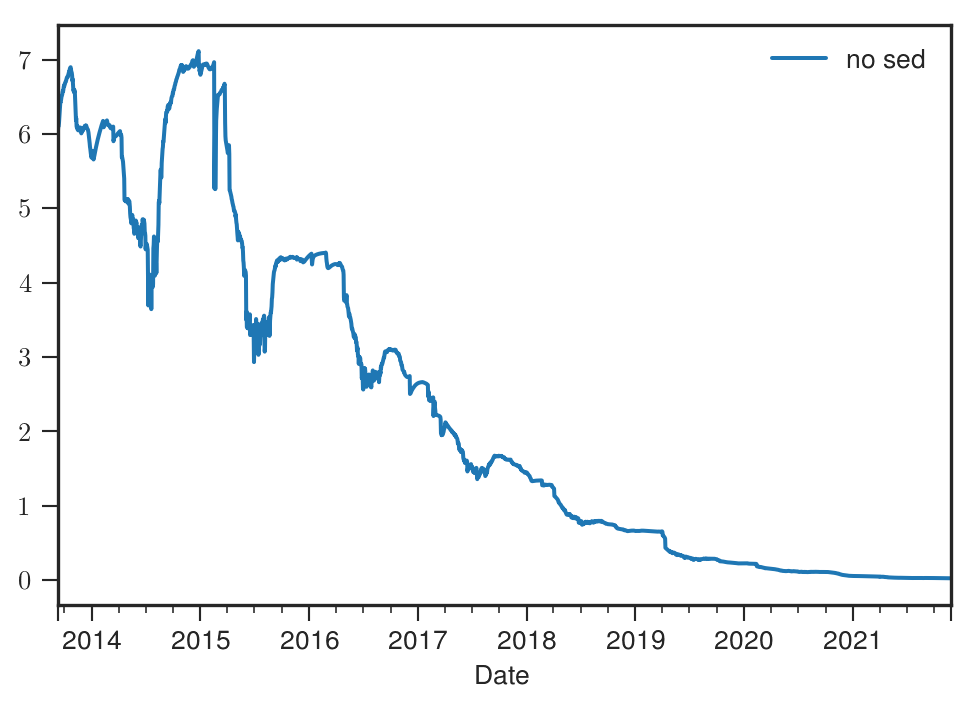

In [85]:
PO4_4m_no_sed[5000:8000].plot(y='no sed', x='Date')


In [86]:
390*tau

331.5

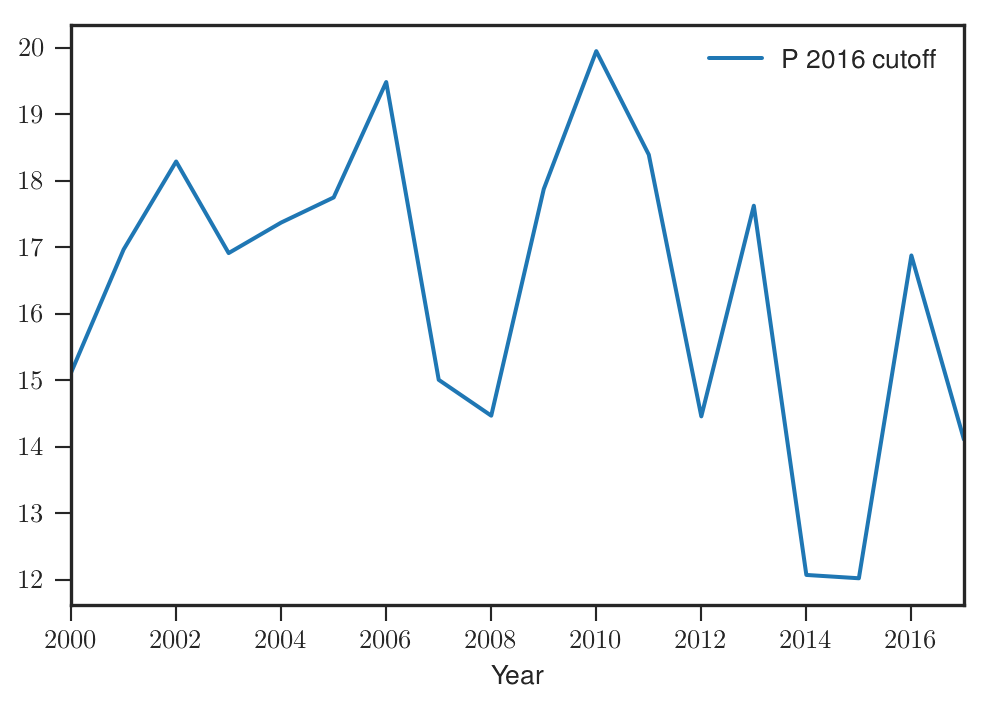

In [87]:
PO4_mean[5500:12000].groupby('Year').mean().plot(y=names_scen[0])

# [5000:8000].groupby('Year').mean()[names_scen[0]].plot(x='Date')



In [88]:
PO4_mean_no_sed[5000:8000].groupby('Year').mean()[names_scen[0]].plot(x='Date')


KeyError: 'P 2016 cutoff'

In [ ]:
PO4_mean

In [ ]:
plt.plot(POP_sum)
plt.plot(PO4ads_sum)
plt.plot(Fe3PO42_sum)
plt.plot(Ca3PO42_sum)
plt.legend(['POP', 'PO4ads', 'Fe3PO42', 'Ca3PO42'], bbox_to_anchor=(1.3,1.05), frameon=1)

In [ ]:
# P_2016_cutoff1985_2100.close()
# P_2016_pulse1985_2100.close() 
# P_2016_increse1985_2100.close()
# hist20y.close()

In [ ]:
po4_model

In [ ]:
po4_model

In [ ]:
x = np.linspace(0, 15, 100)

for s in names_scen:
    plt.figure()
    plt.plot(x, (po4_model[s][0])*np.exp(-x/tau), ':')
    plt.plot(x, (po4_model[s][0])*np.exp(-x/tau/2), ':')
    plt.plot(x, (po4_model[s][0])*np.exp(-x/tau/4), ':')
    plt.plot(po4_model[s], label=s)
    plt.ylabel('Phosphate, ug/L')
    plt.xlabel('Years after cut off')
    plt.legend([r'$e^{-t/\tau}$',r'$e^{-t/2\tau}$', r'$e^{-t/4\tau}$','Actual concentration in lake'])

In [ ]:
po4_model = {}
for y,s in zip([2015],names_scen):
    po4_model[s] = PO4_4m[(PO4_4m.Year>(y-1)) & (PO4_4m.Year<(y+16))].groupby(['Year'])[s].mean().values

In [ ]:
x = np.linspace(0, 15, 100)

for s in names_scen:
    plt.figure()
    plt.plot(x, (po4_model[s][0])*np.exp(-x/tau), ':')
    plt.plot(x, (po4_model[s][0])*np.exp(-x/tau/4), ':')
    plt.plot(x, (po4_model[s][0])*np.exp(-x/tau/8), ':')
    plt.plot(po4_model[s], label=s)
    plt.ylabel('Phosphate, ug/L')
    plt.xlabel('Years after cut off')
    plt.legend([r'$e^{-t/\tau}$',r'$e^{-t/4\tau}$', r'$e^{-t/8\tau}$','Actual concentration in lake'])

In [ ]:
plt.plot(np.linspace(2001,2031,31), np.log(P_fx.groupby('Year').mean()[names_scen].values))
plt.xlim(2015,2031)
# plt.ylim(0,6.5)
plt.ylabel('P flux, $mg-P/m^2/d$')

In [ ]:
len(x)

In [ ]:
len(po4_measured)

In [ ]:
x

In [ ]:
P_gradual_increase_2015_cutoff_to_02000_2030.close()

In [ ]:
P_gradual_increase_2015_cutoff_to_02000_2030.close()

In [ ]:
P_gradual_increase_2015_cutoff_to_02000_2030.close()

In [ ]:
P_gradual_increase_2015_cutoff_to_02000_2030_no_sed.close()

In [ ]:
P_gradual_increase_2015_cutoff_to_02000_2030_no_sed = h5py.File('/Users/imarkelo/git/MyLake_v2_Vansjo/IO/24_P_gradual_increas_no_chl_2015_cutoff_to_0_2200_no_sediment.mat', 'r')

In [ ]:
inflow_TP = np.array(P_gradual_increase_2015_cutoff_to_02000_2030_no_sed['MyLake_results']['basin1']['Inflw'][4, :])
inflow_POP = np.array(P_gradual_increase_2015_cutoff_to_02000_2030_no_sed['MyLake_results']['basin1']['Inflw'][22, :])
inflow_DOP = np.array(P_gradual_increase_2015_cutoff_to_02000_2030_no_sed['MyLake_results']['basin1']['Inflw'][5, :])

In [ ]:
inflow_Q = np.array(P_gradual_increase_2015_cutoff_to_02000_2030_no_sed['MyLake_results']['basin1']['Inflw'][0, :])

In [ ]:
date = datetime(2000, 1, 1)
days = len(np.array(P_gradual_increase_2015_cutoff_to_02000_2030_no_sed['MyLake_results']['basin1']['concentrations']['C'])[:,8])
ds = pd.date_range(date, date + timedelta(days-1), freq='D')

In [ ]:
TP_load = pd.DataFrame({'Date': ds,'TP':inflow_TP*inflow_Q, 'POP':inflow_POP*inflow_Q, 'DOP':inflow_DOP*inflow_Q})

In [ ]:
TP_load['Year'] = TP_load.Date.dt.year
TP_load['Month'] = TP_load.Date.dt.month
TP_load['Day'] = TP_load.Date.dt.day
TP_load['DOY'] = TP_load.Date.dt.dayofyear
TP_load['WOY'] = TP_load.Date.dt.weekofyear

In [ ]:
(TP_load.groupby('Year').mean()*365*1e-9)[['TP','POP']].plot.bar(stacked=True)
# (TP_load.groupby('Year').mean()*365*1e-9)[].plot(x='Date', lw=2, label='POP')
plt.ylim(0,None)
plt.ylabel('Annual load, metric tons')
plt.grid(alpha=0.5)
plt.legend(frameon=1)
# plt.xlim(datetime(2000, 1, 1),datetime(2030, 1, 1))

In [ ]:
TP_load.groupby('Year')['load']

In [ ]:
df = (TP_load.groupby('Year').sum()*1e-9)[['TP','POP', 'DOP']]

In [ ]:


# p1 = plt.bar(df.index.values[:20], df.TP.values[:20], label='Fe-P')
p0 = plt.bar(df.index.values[:20], df.POP.values[:20], label='POP', color=sns.color_palette()[2])
p0 = plt.bar(df.index.values[:20], df.DOP.values[:20], label='DOP',bottom=df.POP.values[:20], color=sns.color_palette()[4])
# p0 = plt.bar(df.index.values[:20], (df.TP.values[:20] - df.POP.values[:20]-df.DOP.values[:20])/2, label='DIP',bottom=1.4*df.POP.values[:20]+df.DOP.values[:20], color=sns.color_palette()[3])




# p2 = plt.bar(ind, womenMeans, width, bottom=menMeans, yerr=womenStd)


# df.plot.bar(stacked=True,x='Year')
# (TP_load.groupby('Year').mean()*365*1e-9)[].plot(x='Date', lw=2, label='POP')
plt.ylim(0,None)
plt.xlim(1999,2050)
plt.ylabel('Annual load, metric tons')
plt.grid(alpha=0.5)
plt.legend(frameon=1)
# plt.xlim(datetime(2000, 1, 1),datetime(2030, 1, 1))

In [ ]:
x = np.linspace(0, 185, len(po4_measured))
plt.plot(x, po4_measured, 'k-', lw=2)
plt.plot(x[:-1], po4_measured_no_sed - po4_measured_no_sed[-1], 'k-.', lw=1)
x = np.linspace(0, 185, len(po4_measured))
plt.plot(x+5, (po4_measured_no_sed[5]-po4_measured_no_sed[-1])*np.exp(-x/tau), ':', lw=2)
plt.plot(x+5, (po4_measured_no_sed[5]-po4_measured_no_sed[-1])*np.exp(-x/tau/2.5), ':', lw=2)
# ax2.plot(x, po4_measured[0]*np.exp(-x/tau/3), ':', lw=2)
plt.plot(x+5, po4_measured[5]*np.exp(-x/tau/4), ':', lw=2)
plt.xlim(0,15)

In [ ]:
Loadings = pd.DataFrame({'Date': ds})

for res, n in zip(scenarios ,names_scen):
    inflow_q = np.array(res['MyLake_results']['basin1']['Inflw'][0, :])
    inflow_TP = np.array(res['MyLake_results']['basin1']['Inflw'][4, :])
    area = 2.38e+7
    
    Loadings['TP inflow'] = inflow_q * inflow_TP / 31 * 1000 / area * 365 / 1e4
    Loadings['P fx'] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['PO4'])
    Loadings['Phy'] = np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['C'])[:,:],axis=1) + np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['Chl'])[:,:], axis=1)
    
Loadings['Year'] = Loadings.Date.dt.year
Loadings['Month'] = Loadings.Date.dt.month
Loadings['Day'] = Loadings.Date.dt.day
Loadings['DOY'] = Loadings.Date.dt.dayofyear
Loadings['WOY'] = Loadings.Date.dt.weekofyear

In [ ]:
mean_loading = Loadings[:20*365].groupby('WOY').mean()[['TP inflow', 'P fx', 'Phy']]

In [ ]:
# mean_loading.plot()
fig = plt.figure(figsize=(6,3), dpi=190)
p0 = plt.bar(mean_loading.index.values, mean_loading['P fx'].values, label='Internal Loading', color=sns.color_palette()[2], align='center')
p1 = plt.bar(mean_loading.index.values, mean_loading['TP inflow'].values, label='From Catchment',bottom=mean_loading['P fx'].values, color=sns.color_palette()[1],align='center')
# plt.ylim(0,None)
plt.xlim(0.5,53.5)
plt.ylim(0,6)
plt.ylabel('P Loading, $[\mu mol\cdot cm^{-2}\cdot year^{-1}]$')
plt.grid(alpha=0.5)
ax2 = plt.gca().twinx()
a2, = ax2.plot(mean_loading.index.values, mean_loading.Phy.values, label='Phytoplankton', lw=2)
ax2.set_ylim(0,3)
ax2.set_ylabel('Average Phy-P in Water Column, $[mg$-$P\cdot L^{-1}]$')
plt.legend([p0,p1,a2], ['Internal Loading', 'Catchment', 'Phytoplankton'], frameon=1)
plt.xticks(np.linspace(1,53,12),[m[:3] for m in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']])

# savefig('cc/P/loading_bars')

In [ ]:
a2